In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

## Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Rectangle
import sys
from pathlib import Path
from nilearn import plotting, datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from scipy.stats import ttest_ind
from matplotlib.lines import Line2D
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ks_2samp
from scipy.stats import pearsonr

# Add project paths
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root / "src"))

figfold = Path("/home/ivan.mindlin/Desktop/HDMF_V3_Figures/panels")
os.makedirs(figfold, exist_ok=True)

# Import experiment management from HDMF src folder
from fastHDMF.simulation_runner import HDMFSimulationRunner
from fastHDMF.experiment_manager import ExperimentManager
from fastHDMF.utils.data_loading import load_all_sc_matrices

sns.set(style="darkgrid")

col_pal_sw_asynch = ['#C9B037','#6C5B7B']
category_colors = {
    'Static': '#009E73',     
    'Dynamic': '#E69F00',    
    'LowLR': '#5F9EA0',      
    'HighLR': '#A93226',     
    'STR': '#009E73',        
    'SCORE': '#882E72',      
    'SW': '#C9B037',         
    'Asynch': '#6C5B7B'      
}

# Font sizes
TITLE = 22
LABEL = 20
TICKS = 20
LEGEND = 20
COLORBAR = 20


# Figure 1

In [3]:
exp_runs = ExperimentManager(project_root, experiment_id="Simple_runs", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_runs = exp_runs.load_experiment_results()

2025-12-19 16:27:41,698 - hdmf_experiment_Simple_runs - INFO - Experiment 'Simple_runs' initialized
2025-12-19 16:27:41,700 - hdmf_experiment_Simple_runs - INFO - Config: Test matching TR to Siemens data
2025-12-19 16:27:41,701 - hdmf_experiment_Simple_runs - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/Simple_runs
2025-12-19 16:27:41,716 - hdmf_experiment_Simple_runs - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:27:41,719 - hdmf_experiment_Simple_runs - INFO - Searching for config file: Simple_runs.yaml
2025-12-19 16:27:41,720 - hdmf_experiment_Simple_runs - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:27:41,728 - hdmf_experiment_Simple_runs - INFO - Simple_runs
2025-12-19 16:27:41,729 - hdmf_experiment_Simple_runs - INFO - Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Simple_runs.yaml')

INFO: Searching for config file: Simple_runs.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Simple_runs
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Simple_runs.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Simple_runs.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


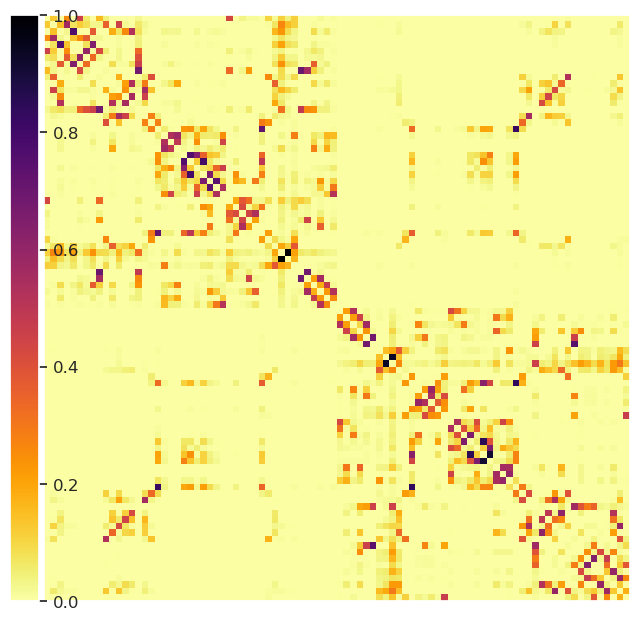

In [4]:




figname = 'FIG_1'
# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(8, 8))
C = exp_runs.sc_matrices['healthy_average']

# normalize by the max value the SC matrix
C = C / np.max(C)
# Plot the connectivity matrix
disp = plotting.plot_matrix(C, colorbar=True, cmap='inferno_r', axes=ax)

# Adjust the colorbar position
cbar = disp.colorbar
cbar.ax.yaxis.set_ticks_position('right')  # Move ticks to the right
cbar.ax.yaxis.set_tick_params(labelsize=12)  # Adjust tick label size

# Remove ticks from the matrix plot
disp.axes.set_xticks([])
disp.axes.set_yticks([])

# Save the figure as SVG and PNG
fig.savefig(figfold / (figname + '_A1.svg'), dpi=300, bbox_inches='tight')
fig.savefig(figfold / (figname + '_A1.png'), dpi=300, bbox_inches='tight')

plt.show()



# Fetch AAL atlas (90 regions)

#atlas = datasets.fetch_atlas_aal('3v2')
#atlas_img = atlas.maps

# Obtain coordinates from atlas image
#coords = plotting.find_parcellation_cut_coords(atlas_img)

# Ensure SC matrix size matches coordinates
#assert C.shape[0] == len(coords), f"Mismatch: SC matrix ({C.shape[0]}), coordinates ({len(coords)})"


#fig,ax = plt.subplots(figsize=(10,10))
# Plot connectome on brain surface
#plotting.plot_connectome(C, coords, axes=ax,
#                         node_size=150, edge_threshold="98%",
#                         edge_cmap='inferno_r', display_mode='z',annotate=False,alpha=0.9)

#plt.show()
#plt.tight_layout()
#fig.savefig(figfold + figname + '_A2.svg', dpi=300)
#fig.savefig(figfold + figname + '_A2.png', dpi=300)


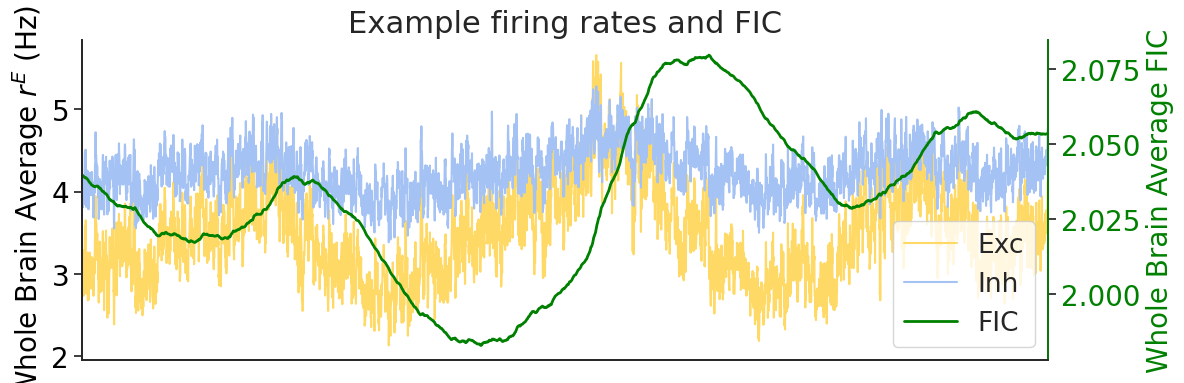

In [5]:
sns.set_style("white")




rates = res_runs['full_results']['observables']['raw_rates'][7][0]
rates_inh = res_runs['full_results']['observables']['raw_rates_inh'][7][0]
fic_t = res_runs['full_results']['observables']['raw_fic'][7][0]


# Example data (replace these with your actual data)
acor_tbase = np.arange(5000)#np.arange(rates.shape[1])  # x-axis data
max_t = len(acor_tbase)
start_t = 4500

# Create the figure and primary axis
fig, ax = plt.subplots(figsize=(12, 4))

# Plot 'rates' data on the primary y-axis
ax.plot(acor_tbase, np.mean(rates[:,start_t:start_t+max_t], axis=0), color='#ffd966ff', label='Exc')
ax.plot(acor_tbase, np.mean(rates_inh[:,start_t:start_t+max_t], axis=0), color='#a4c2f4ff', label='Inh')

# Labels and title for the primary axis
ax.set_ylabel('Whole Brain Average $r^E$ (Hz)', color='black', fontsize=LABEL)
ax.set_title('Example firing rates and FIC', fontsize=TITLE)
ax.tick_params(axis='y', labelcolor='black', labelsize=TICKS)
ax.set_xlim([0, max_t])

# Create a twin axis sharing the same x-axis for 'fic_t'
ax2 = ax.twinx()
ax2.plot(acor_tbase, np.mean(fic_t[:,start_t:start_t+max_t], axis=0), color='green', linewidth=2, label='FIC')

# Labels for the secondary axis
ax2.set_ylabel('Whole Brain Average FIC', color='green', fontsize=LABEL)
ax2.tick_params(axis='y', labelcolor='green', labelsize=TICKS)
ax2.spines['right'].set_color('green')

# Customize spines for a cleaner look
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Optionally hide x-axis labels and ticks
ax.set_xticklabels([])
ax.set_xlabel('')  # Comment this line if you want the x-axis label

# Add legends for both axes
lines_1, labels_1 = ax.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower right', fontsize=LEGEND-1)

# Layout and save
plt.tight_layout()
fig.savefig(figfold / (figname + '_A.svg'), dpi=300)
fig.savefig(figfold / (figname + '_A.png'), dpi=300)
plt.show()


# Figure 2

In [6]:
experiment_manager = ExperimentManager(project_root, experiment_id="Homeostatic_Grid", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res = experiment_manager.load_experiment_results()

hom_grid = np.stack(res['full_results']['observables']['mean_rates'].flatten())
hom_grid = np.reshape(hom_grid, (100,110,17,90))
obj_rate = 3.44
hom_grid = obj_rate - np.mean(hom_grid, axis=-1)
hom_grid_mean = np.mean(hom_grid, axis=2)
hom_grid_std = np.std(hom_grid, axis=2)

fun_name = res['metadata']['config']['simulation']['over']['G']['fun']
fun = eval(fun_name)
# Apply fun_name
G_range = fun(*res['metadata']['config']['simulation']['over']['G']['args'])
LR_range = res['full_results']['axis_values']['lrj']
DECAY_range = res['full_results']['axis_values']['taoj']

ngs = len(G_range)
nlr = len(LR_range)
ndec = len(DECAY_range)
lr_labels = [1, 10, 100]
dec_labels = [100, 1000, 10000]

# Extracting Minimum mismatch
min_mm_pos = np.argmin(np.abs(hom_grid_mean),axis=1) 


fit_res = np.polyfit(LR_range, min_mm_pos, 1)
fit_res_2plot = np.polyfit(range(0,nlr), min_mm_pos, 1)
    

2025-12-19 16:29:30,132 - hdmf_experiment_Homeostatic_Grid - INFO - Experiment 'Homeostatic_Grid' initialized
2025-12-19 16:29:30,133 - hdmf_experiment_Homeostatic_Grid - INFO - Config: Homeostatic grid for objective rate 3.44. Used to then calculate LR->DECAY coefficients. Now supports custom parameter generation functions.
2025-12-19 16:29:30,134 - hdmf_experiment_Homeostatic_Grid - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Homeostatic_Grid
2025-12-19 16:29:30,149 - hdmf_experiment_Homeostatic_Grid - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:29:30,151 - hdmf_experiment_Homeostatic_Grid - INFO - Searching for config file: Homeostatic_Grid.yaml
2025-12-19 16:29:30,152 - hdmf_experiment_Homeostatic_Grid - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:29:30,160 - hdmf_experiment_Homeostatic_Grid - INFO - Homeostatic_Grid
2025-12-19 16:29:30,161 - hdmf_ex

INFO: Searching for config file: Homeostatic_Grid.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Homeostatic_Grid
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Homeostatic_Grid.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Homeostatic_Grid.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


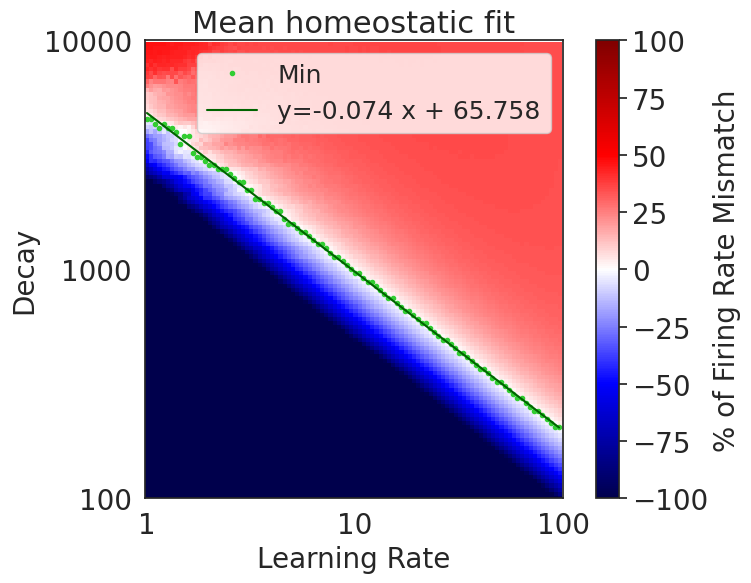

In [7]:
figname = 'FIG_2_A'
fig = plt.figure(figsize=(8, 6))
plt.imshow((100 * hom_grid_mean / obj_rate).T, vmin=-100, vmax=100, cmap='seismic', 
            origin='lower', interpolation='none')
plt.plot(range(0, nlr), min_mm_pos, '.', label='Min', color='limegreen')
plt.plot(range(0, nlr), fit_res_2plot[0] * range(0, nlr) + fit_res_2plot[1], '-', 
            color='darkgreen',
            label='y=' + "{:.3f}".format(fit_res[0]) + ' x + ' + "{:.3f}".format(fit_res[1]))        

plt.xticks(ticks=np.linspace(0, nlr, 3), labels=lr_labels, fontsize=TICKS)
plt.xlabel('Learning Rate', fontsize=LABEL)
plt.title('Mean homeostatic fit', fontsize=TITLE)
plt.ylim([0, ndec])
plt.legend(fontsize=LEGEND-2)

plt.yticks(ticks=np.linspace(0, ndec, 3), labels=dec_labels, fontsize=TICKS)   
plt.ylabel('Decay', fontsize=LABEL)


plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar

# Colorbar
#cbar_ax = fig.add_axes([0.92, 0.31, 0.02, 0.38])  # Adjust position and size of the colorbar
#cbar = plt.colorbar(cax=cbar_ax)
cbar = plt.colorbar()
cbar.set_label('% of Firing Rate Mismatch', fontsize=COLORBAR)
cbar.ax.tick_params(labelsize=TICKS)  # Colorbar ticks fontsize

plt.show()

# Save the figure
fig.savefig(figfold / (figname + '.png'), dpi=300, bbox_inches='tight')
fig.savefig(figfold / (figname + '.svg'), dpi=300, bbox_inches='tight')


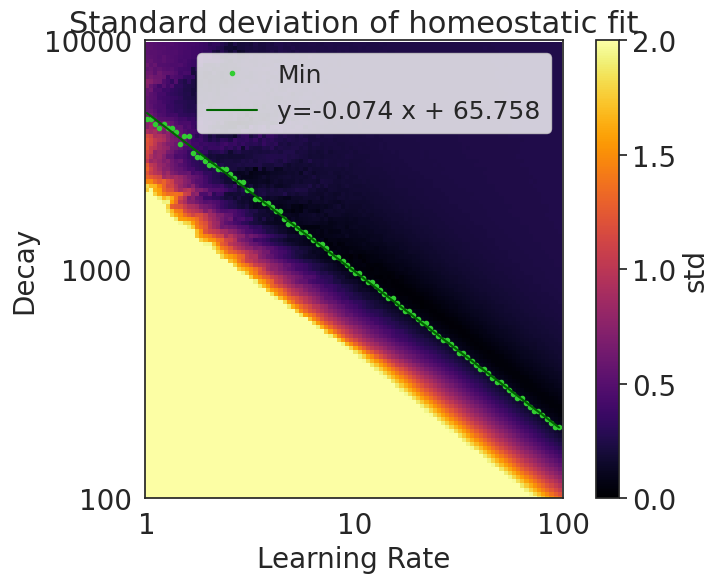

In [8]:
figname = 'FIG_2_B'
fig = plt.figure(figsize=(8, 6))
plt.imshow(hom_grid_std.T,vmin=0,vmax=2, cmap='inferno', origin='lower', interpolation='none')
plt.plot(range(0, nlr), min_mm_pos, '.', label='Min', color='limegreen')
plt.plot(range(0, nlr), fit_res_2plot[0] * range(0, nlr) + fit_res_2plot[1], '-', 
            color='darkgreen',
            label='y=' + "{:.3f}".format(fit_res[0]) + ' x + ' + "{:.3f}".format(fit_res[1]))        

plt.xticks(ticks=np.linspace(0, nlr, 3), labels=lr_labels, fontsize=TICKS)
plt.xlabel('Learning Rate', fontsize=LABEL)
plt.title('Standard deviation of homeostatic fit', fontsize=TITLE)
plt.ylim([0, ndec])
plt.legend(fontsize=LEGEND-2)

plt.yticks(ticks=np.linspace(0, ndec, 3), labels=dec_labels, fontsize=TICKS)   
plt.ylabel('Decay', fontsize=LABEL)


plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar

# Colorbar
#cbar_ax = fig.add_axes([0.92, 0.31, 0.02, 0.38])  # Adjust position and size of the colorbar
#cbar = plt.colorbar(cax=cbar_ax)
cbar = plt.colorbar()
cbar.set_label('std', fontsize=COLORBAR)
cbar.ax.tick_params(labelsize=TICKS)  # Colorbar ticks fontsize
cbar.ax.locator_params(nbins=5)  # Reduce number of ticks

plt.show()

# Save the figure
fig.savefig(figfold / (figname + '.png'), dpi=300, bbox_inches='tight')
fig.savefig(figfold / (figname + '.svg'), dpi=300, bbox_inches='tight')


### sUPP HOMM FIT

In [9]:
# Load homeostatic grid results for different target firing rates
experiment_manager = ExperimentManager(project_root, experiment_id="Homeostatic_Grid", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_344 = experiment_manager.load_experiment_results()

experiment_manager = ExperimentManager(project_root, experiment_id="Homeostatic_Grid_688", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_688 = experiment_manager.load_experiment_results()

experiment_manager = ExperimentManager(project_root, experiment_id="Homeostatic_Grid_15", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_15 = experiment_manager.load_experiment_results()

# Organize results by target rate
hom_fit_results = {
    '6.88': res_688['full_results']['observables']['mean_rates'],
    '15': res_15['full_results']['observables']['mean_rates']
}

obj_rates = [6.88, 15]
# Get parameter ranges from one of the experiments
fun_name = res_688['metadata']['config']['simulation']['over']['G']['fun']
fun = eval(fun_name)
# Apply fun_name
G_range = fun(*res_688['metadata']['config']['simulation']['over']['G']['args'])
LR_range = res_688['full_results']['axis_values']['lrj']
DECAY_range = res_688['full_results']['axis_values']['taoj']

nG = len(G_range)
nlr = len(LR_range)
ndec = len(DECAY_range)

print(f"Grid dimensions: G={nG}, LR={nlr}, DECAY={ndec}")
print(f"Target rates: {obj_rates}")

2025-12-19 16:29:32,941 - hdmf_experiment_Homeostatic_Grid - INFO - Experiment 'Homeostatic_Grid' initialized
2025-12-19 16:29:32,942 - hdmf_experiment_Homeostatic_Grid - INFO - Config: Homeostatic grid for objective rate 3.44. Used to then calculate LR->DECAY coefficients. Now supports custom parameter generation functions.
2025-12-19 16:29:32,944 - hdmf_experiment_Homeostatic_Grid - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Homeostatic_Grid
2025-12-19 16:29:32,963 - hdmf_experiment_Homeostatic_Grid - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:29:32,967 - hdmf_experiment_Homeostatic_Grid - INFO - Searching for config file: Homeostatic_Grid.yaml
2025-12-19 16:29:32,968 - hdmf_experiment_Homeostatic_Grid - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:29:32,978 - hdmf_experiment_Homeostatic_Grid - INFO - Homeostatic_Grid
2025-12-19 16:29:32,980 - hdmf_ex

INFO: Searching for config file: Homeostatic_Grid.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Homeostatic_Grid
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Homeostatic_Grid.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Homeostatic_Grid.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


2025-12-19 16:29:33,709 - hdmf_experiment_Homeostatic_Grid_688 - INFO - Experiment 'Homeostatic_Grid_688' initialized
2025-12-19 16:29:33,710 - hdmf_experiment_Homeostatic_Grid_688 - INFO - Config: Homeostatic grid for objective rate 3.44. Used to then calculate LR->DECAY coefficients. Now supports custom parameter generation functions.
2025-12-19 16:29:33,711 - hdmf_experiment_Homeostatic_Grid_688 - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Homeostatic_Grid_688
2025-12-19 16:29:33,721 - hdmf_experiment_Homeostatic_Grid_688 - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:29:33,724 - hdmf_experiment_Homeostatic_Grid_688 - INFO - Searching for config file: Homeostatic_Grid_688.yaml
2025-12-19 16:29:33,725 - hdmf_experiment_Homeostatic_Grid_688 - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:29:33,732 - hdmf_experiment_Homeostatic_Grid_688 - INFO - Homeostati

INFO: Searching for config file: Homeostatic_Grid_688.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Homeostatic_Grid_688
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Homeostatic_Grid_688.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Homeostatic_Grid_688.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices
INFO: Searching for config file: Homeostatic_Grid_15.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Homeostatic_Grid_15
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Homeostatic_Grid_15.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Homeostatic_Grid_15.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matri

2025-12-19 16:29:33,886 - hdmf_experiment_Homeostatic_Grid_15 - INFO - Homeostatic_Grid_15
2025-12-19 16:29:33,887 - hdmf_experiment_Homeostatic_Grid_15 - INFO - Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Homeostatic_Grid_15.yaml')]
2025-12-19 16:29:33,903 - hdmf_experiment_Homeostatic_Grid_15 - INFO - Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Homeostatic_Grid_15.yaml


Grid dimensions: G=17, LR=100, DECAY=110
Target rates: [6.88, 15]


Target rate 6.88 Hz: shape=(100, 110, 17, 90)
Target rate 15 Hz: shape=(100, 110, 17, 90)


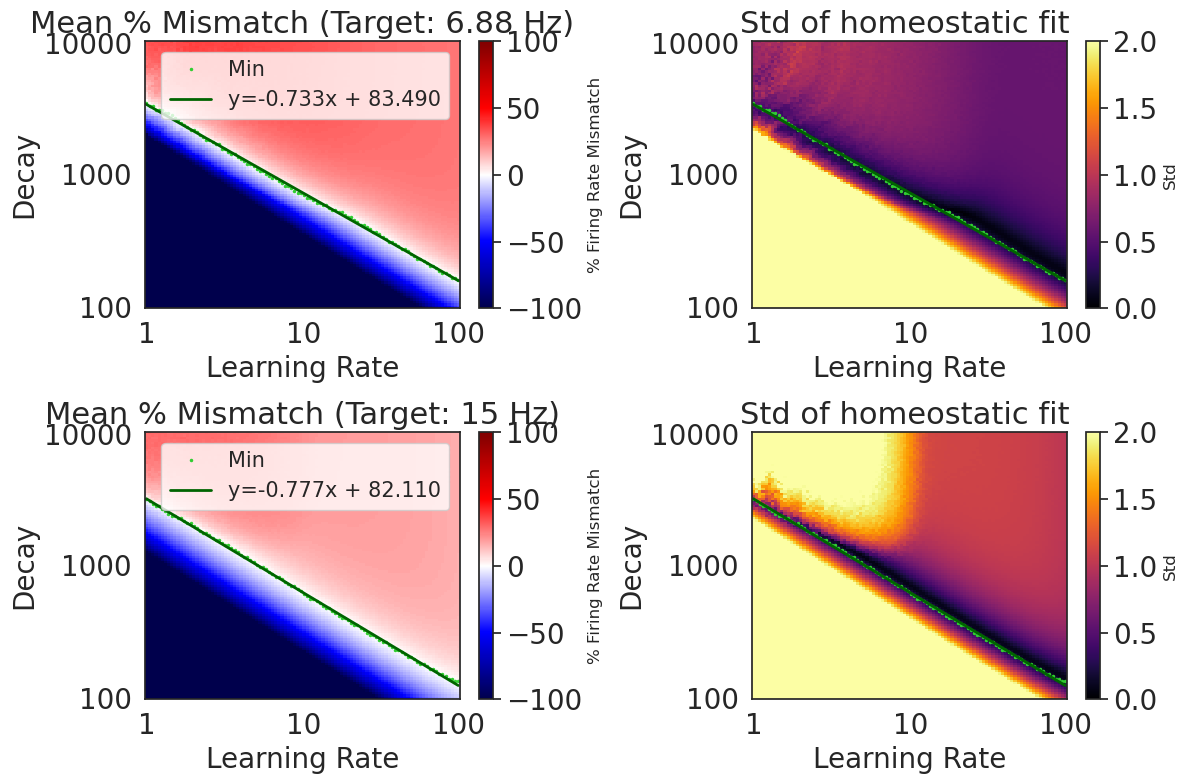


Figure saved as Supp_fig_1_a.png and Supp_fig_1_a.svg


In [10]:


# Calculate mean and std over G axis for each target rate
mean_hom_fit = []
std_hom_fit = []

# Extract minimum mismatch positions for each rate
min_mm_pos = []
fit_res = []
fit_res_2plot = []
for rate_str, rate_val in zip(['6.88', '15'], obj_rates):
    arr = hom_fit_results[rate_str]
    print(f"Target rate {rate_val} Hz: shape={arr.shape}")
    
    arr = rate_val - arr.mean(axis=-1)
    # Mean over regions
    a_mean = np.mean(arr, axis=-1)
    a_std = np.std(arr, axis=-1)

    mean_hom_fit.append(a_mean)
    std_hom_fit.append(a_std)
    

    min_pos = np.argmin(np.abs(a_mean), axis=1)
    min_mm_pos.append(min_pos)
    
    # Fit linear trend
    coeff = np.polyfit(LR_range, min_pos, 1)
    fit_res.append(coeff)
    fit_res_2plot.append(np.polyfit(range(0, nlr), min_pos, 1))

# Create 4x4 subplot figure
fig = plt.figure(figsize=(12, 8))

# Row 1: Mean percentage mismatch heatmaps for each target rate
for i, (rate, mean_fit) in enumerate(zip(obj_rates, mean_hom_fit)):
    ax = plt.subplot(len(obj_rates), 2, i*2+1)
    
    # Calculate percentage mismatch
    heat = 100.0 * mean_fit / float(rate)
    
    im = ax.imshow(heat.T,vmin=-100,vmax=100,cmap='seismic',origin='lower',interpolation='none',aspect='auto')
    
    # Overlay min points and fitted line
    x_idx = range(0,nlr)
    ax.plot(x_idx, min_mm_pos[i], '.', label='Min', color='limegreen', markersize=3)
    ax.plot(x_idx,fit_res_2plot[i][0] * x_idx + fit_res_2plot[i][1],'-', color='darkgreen', linewidth=2,label=f"y={fit_res_2plot[i][0]:.3f}x + {fit_res_2plot[i][1]:.3f}")
    
    # Formatting
    xticks = [0, nlr//2, nlr-1]
    xlabels = ['1', '10', '100']
    ax.set_xticks(ticks=xticks, labels=xlabels,fontsize=TICKS)
    ax.set_xlabel('Learning Rate', fontsize=LABEL)
    ax.set_title(f'Mean % Mismatch (Target: {rate} Hz)', fontsize=TITLE)
    
    yticks = [0, ndec//2, ndec-1]
    ylabels = ['100', '1000', '10000']
    ax.set_yticks(ticks=yticks, labels=ylabels,fontsize=TICKS)
    ax.set_ylabel('Decay', fontsize=LABEL)
    ax.legend(fontsize=TICKS-5)
    
    # Colorbar
    cbar = plt.colorbar(im, ax=ax, label='% Firing Rate Mismatch')
    cbar.ax.tick_params(labelsize=COLORBAR)
    
    ax = plt.subplot(len(obj_rates), 2, i*2 + 2)
    
    # Calculate percentage std
    heat =  std_hom_fit[i] 
    
    im = ax.imshow(heat.T,vmin=0,vmax=2,cmap='inferno',origin='lower',interpolation='none',aspect='auto',)
    ax.plot(x_idx, min_mm_pos[i], '.', label='Min', color='limegreen', markersize=3)
    ax.plot(x_idx,fit_res_2plot[i][0] * x_idx + fit_res_2plot[i][1],'-', color='darkgreen', linewidth=2,label=f"y={fit_res_2plot[i][0]:.3f}x + {fit_res_2plot[i][1]:.3f}")
    # Formatting
    xticks = [0, nlr//2, nlr-1]
    xlabels = ['1', '10', '100']
    ax.set_xticks(ticks=xticks, labels=xlabels, fontsize=TICKS)
    ax.set_xlabel('Learning Rate', fontsize=LABEL)
    ax.set_title(f'Std of homeostatic fit ', fontsize=TITLE)
    
    yticks = [0, ndec//2, ndec-1]
    ylabels = ['100', '1000', '10000']
    ax.set_yticks(ticks=yticks, labels=ylabels,fontsize=TICKS)
    ax.set_ylabel('Decay', fontsize=LABEL)
    
    # Colorbar
    cbar = plt.colorbar(im, ax=ax, label='Std')
    cbar.ax.tick_params(labelsize=COLORBAR)



plt.tight_layout()
fig.savefig(figfold / 'Supp_fig_1_a.png', dpi=300, bbox_inches='tight')
fig.savefig(figfold / 'Supp_fig_1_a.svg', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nFigure saved as Supp_fig_1_a.png and Supp_fig_1_a.svg")

### Stability

In [11]:

experiment_manager = ExperimentManager(project_root, experiment_id="Static_Stability", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_static = experiment_manager.load_experiment_results()
experiment_manager = ExperimentManager(project_root, experiment_id="Dynamic_Stability", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_dynamic = experiment_manager.load_experiment_results()
experiment_manager = ExperimentManager(project_root, experiment_id="Mixed_Stability", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_mixed = experiment_manager.load_experiment_results()


2025-12-19 16:29:36,259 - hdmf_experiment_Static_Stability - INFO - Experiment 'Static_Stability' initialized
2025-12-19 16:29:36,260 - hdmf_experiment_Static_Stability - INFO - Config: Showing firing rate stability across G values in the static model
2025-12-19 16:29:36,261 - hdmf_experiment_Static_Stability - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/Static_Stability
2025-12-19 16:29:36,272 - hdmf_experiment_Static_Stability - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:29:36,275 - hdmf_experiment_Static_Stability - INFO - Searching for config file: Static_Stability.yaml
2025-12-19 16:29:36,276 - hdmf_experiment_Static_Stability - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:29:36,285 - hdmf_experiment_Static_Stability - INFO - Static_Stability
2025-12-19 16:29:36,286 - hdmf_experiment_Static_Stability - INFO - Found config matches: [PosixPath('/netwo

INFO: Searching for config file: Static_Stability.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Static_Stability
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Static_Stability.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Static_Stability.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices
INFO: Searching for config file: Dynamic_Stability.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Dynamic_Stability
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Dynamic_Stability.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/old/Dynamic_Stability.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Dynamic_Stability.yaml

2025-12-19 16:29:36,412 - hdmf_experiment_Mixed_Stability - INFO - Experiment 'Mixed_Stability' initialized
2025-12-19 16:29:36,413 - hdmf_experiment_Mixed_Stability - INFO - Config: Showing firing rate stability across G values in the static model
2025-12-19 16:29:36,414 - hdmf_experiment_Mixed_Stability - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/Mixed_Stability
2025-12-19 16:29:36,432 - hdmf_experiment_Mixed_Stability - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:29:36,436 - hdmf_experiment_Mixed_Stability - INFO - Searching for config file: Mixed_Stability.yaml
2025-12-19 16:29:36,438 - hdmf_experiment_Mixed_Stability - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs


INFO: Mixed_Stability
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Mixed_Stability.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/old/Mixed_Stability.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Mixed_Stability.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


2025-12-19 16:29:36,449 - hdmf_experiment_Mixed_Stability - INFO - Mixed_Stability
2025-12-19 16:29:36,450 - hdmf_experiment_Mixed_Stability - INFO - Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Mixed_Stability.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/old/Mixed_Stability.yaml')]
2025-12-19 16:29:36,465 - hdmf_experiment_Mixed_Stability - INFO - Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Mixed_Stability.yaml


In [13]:
dyn_fic_reps = res_dynamic['full_results']['observables']['mean_fic']
stat_fic_reps = res_static['full_results']['observables']['mean_fic']

avg_fr_dyn_values = res_dynamic['full_results']['observables']['mean_rates'].mean(axis=-1)
avg_fr_stat_values = res_static['full_results']['observables']['mean_rates'].mean(axis=-1)
avg_fr_mixed_values = res_mixed['full_results']['observables']['mean_rates'].mean(axis=-1)
G_values = res_dynamic['full_results']['axis_values']['G']

In [14]:
from scipy.stats import pearsonr
# Calculate the correlation between the repetitions of dynamic and static FIC
corr_values = np.zeros((len(G_values),dyn_fic_reps.shape[1]))
for i in range(len(G_values)):
    for j in range(dyn_fic_reps.shape[1]):
        corr_values[i,j] = pearsonr(dyn_fic_reps[i, j, :], stat_fic_reps[i, j, :])[0]
# Calculate the mean and standard deviation of the correlation values
mean_corr_values = np.mean(corr_values, axis=1)
std_corr_values = np.std(corr_values, axis=1)
# Calcualte the MSE between the repetitions of dynamic and static FIC
mse_values = np.zeros((len(G_values),dyn_fic_reps.shape[1]))
for i in range(len(G_values)):
    for j in range(dyn_fic_reps.shape[1]):
        mse_values[i,j] = np.mean((dyn_fic_reps[i, j, :] - stat_fic_reps[i, j, :])**2)
# Calculate the mean and standard deviation of the MSE values
mean_mse_values = np.mean(mse_values, axis=1)
std_mse_values = np.std(mse_values, axis=1)

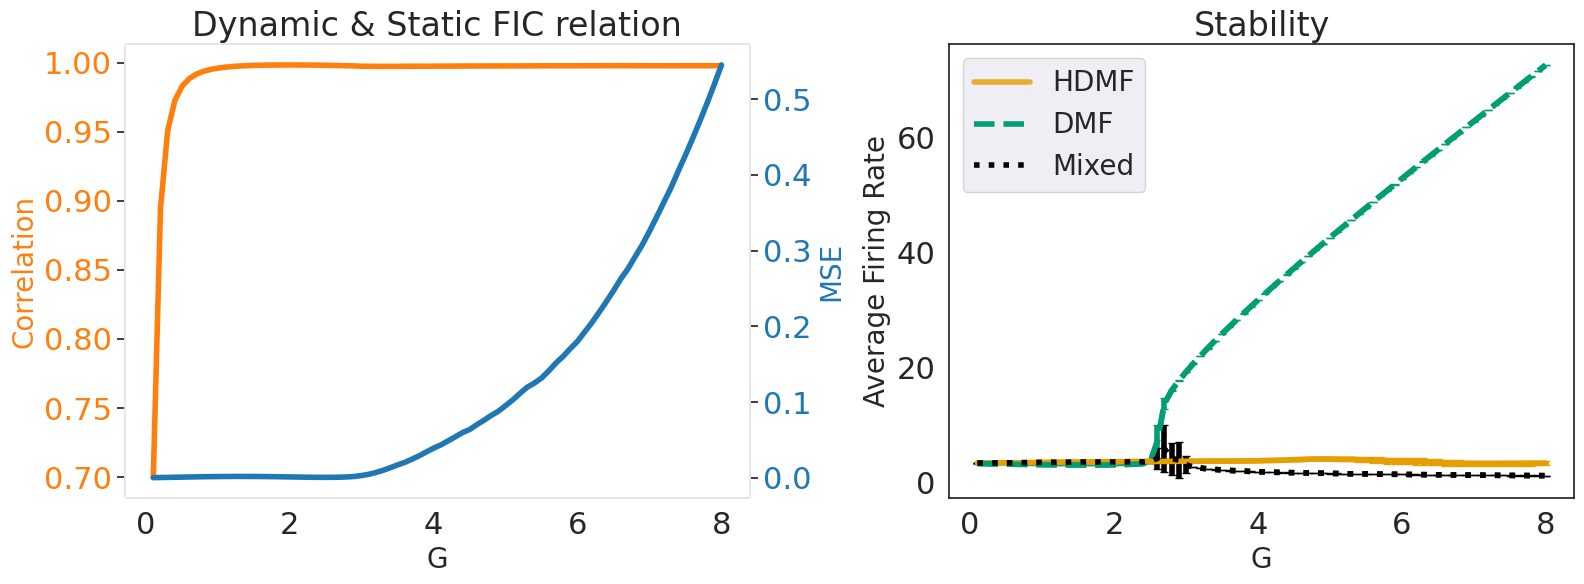

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# Define figure parameters


# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
with sns.axes_style("darkgrid"):
    # Subplot 1: Shared y-axis plot for Correlation and MSE
    ax1 = axes[0]
    color = 'tab:orange'
    ax1.set_xlabel('G', fontsize=LABEL)
    ax1.set_ylabel('Correlation', color=color, fontsize=LABEL)
    ax1.plot(G_values, mean_corr_values, color=color, label='Correlation', linewidth=4)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=TICKS+2)
    ax1.tick_params(axis='x', labelsize=TICKS+2)
with sns.axes_style("dark"):
    # MSE (Right y-axis)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('MSE', color=color, fontsize=LABEL)
    ax2.plot(G_values, mean_mse_values, color=color, label='MSE',linewidth=4)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=TICKS+2)

ax1.set_title('Dynamic & Static FIC relation', fontsize=TITLE+2)
with sns.axes_style("darkgrid"):
    # Subplot 2: Stability plot
    ax3 = axes[1]

    # Dynamic FIC: plot mean with shaded standard deviation
    mean_dyn = np.mean(avg_fr_dyn_values, axis=1)
    std_dyn = np.std(avg_fr_dyn_values, axis=1)       
    # Then plot the mean (thicker, with a legend entry)
    ax3.plot(G_values,
            mean_dyn,
            '-',
            color=category_colors['Dynamic'],
            linewidth=4,
            alpha=0.8,
            label='HDMF')
    ax3.errorbar(
        G_values,
        mean_dyn,
        yerr=std_dyn,
        fmt='-',
        color=category_colors['Dynamic'],
        linewidth=4,
        capsize=3,
        label='_nolegend_',
    )


    # Static FIC: plot mean with shaded standard deviation (dashed line)
    mean_stat = np.mean(avg_fr_stat_values, axis=1)
    std_stat = np.std(avg_fr_stat_values, axis=1)
    # Then plot the mean (thicker, with a legend entry)
    ax3.plot(G_values,
            mean_stat,
            '--',
            color=category_colors['Static'],
            linewidth=4,
            label='DMF')
    ax3.errorbar(
        G_values,
        mean_stat,
        yerr=std_stat,
        fmt='--',
        color=category_colors['Static'],
        linewidth=4,
        capsize=3,
        label='_nolegend_',
    )

    # Mixed values: plot each repetition with shaded error

    mix_rep = np.mean(avg_fr_mixed_values, axis=1)
    mix_std = np.std(avg_fr_mixed_values, axis=1)    

    ax3.plot(G_values,
            mix_rep,
            ':',
            color='black',
            linewidth=4,
            label='Mixed')
    ax3.errorbar(
            G_values,
            mix_rep,
            yerr=mix_std,
            fmt=':',
            color='black',
            linewidth=4,
            capsize=3,
            label='_nolegend_',
        )

    ax3.set_xlabel('G', fontsize=LABEL)
    ax3.set_ylabel('Average Firing Rate', fontsize=LABEL)
    ax3.tick_params(axis='x', labelsize=TICKS+2)
    ax3.tick_params(axis='y', labelsize=TICKS+2)
    ax3.set_title('Stability', fontsize=TITLE+2)
    handles, labels = ax3.get_legend_handles_labels()
    unique = dict(zip(labels, handles))
    ax3.legend(unique.values(), unique.keys(), fontsize=LEGEND)


# Adjust layout and save the figure
plt.tight_layout()
fig.savefig(figfold / 'FIG_2_C_D_combined.png', dpi=300)
fig.savefig(figfold / 'FIG_2_C_D_combined.svg', dpi=300)
plt.show()


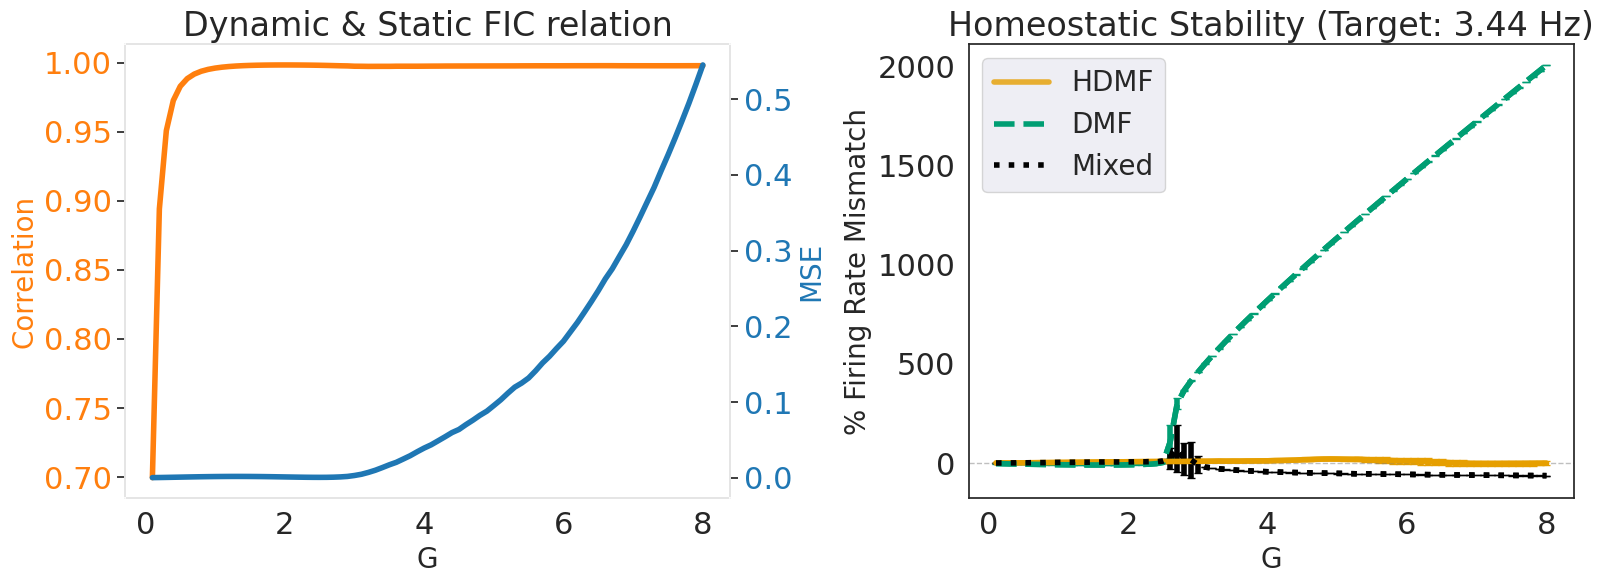

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define objective rate (target rate from homeostatic grid)
obj_rate = 3.44  # Hz - typical objective rate used in homeostatic grid

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
with sns.axes_style("darkgrid"):
    # Subplot 1: Shared y-axis plot for Correlation and MSE
    ax1 = axes[0]
    color = 'tab:orange'
    ax1.set_xlabel('G', fontsize=LABEL)
    ax1.set_ylabel('Correlation', color=color, fontsize=LABEL)
    ax1.plot(G_values, mean_corr_values, color=color, label='Correlation', linewidth=4)
    ax1.tick_params(axis='y', labelcolor=color, labelsize=TICKS+2)
    ax1.tick_params(axis='x', labelsize=TICKS+2)
with sns.axes_style("dark"):
    # MSE (Right y-axis)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('MSE', color=color, fontsize=LABEL)
    ax2.plot(G_values, mean_mse_values, color=color, label='MSE',linewidth=4)
    ax2.tick_params(axis='y', labelcolor=color, labelsize=TICKS+2)

ax1.set_title('Dynamic & Static FIC relation', fontsize=TITLE+2)
with sns.axes_style("darkgrid"):
    # Subplot 2: Percentage Mismatch plot (similar to homeostatic grid)
    ax3 = axes[1]

    # Calculate percentage mismatch from objective rate for each model
    # Dynamic FIC: percentage mismatch
    mean_dyn = np.mean(avg_fr_dyn_values, axis=1)
    std_dyn = np.std(avg_fr_dyn_values, axis=1)
    pct_mismatch_dyn = 100.0 * (mean_dyn - obj_rate) / obj_rate
    pct_mismatch_dyn_std = 100.0 * std_dyn / obj_rate
    
    # Static FIC: percentage mismatch
    mean_stat = np.mean(avg_fr_stat_values, axis=1)
    std_stat = np.std(avg_fr_stat_values, axis=1)
    pct_mismatch_stat = 100.0 * (mean_stat - obj_rate) / obj_rate
    pct_mismatch_stat_std = 100.0 * std_stat / obj_rate
    
    # Mixed: percentage mismatch
    mix_rep = np.mean(avg_fr_mixed_values, axis=1)
    mix_std = np.std(avg_fr_mixed_values, axis=1)
    pct_mismatch_mix = 100.0 * (mix_rep - obj_rate) / obj_rate
    pct_mismatch_mix_std = 100.0 * mix_std / obj_rate
    
    # Plot HDMF (Dynamic FIC)
    ax3.plot(G_values,
            pct_mismatch_dyn,
            '-',
            color=category_colors['Dynamic'],
            linewidth=4,
            alpha=0.8,
            label='HDMF')
    ax3.errorbar(
        G_values,
        pct_mismatch_dyn,
        yerr=pct_mismatch_dyn_std,
        fmt='-',
        color=category_colors['Dynamic'],
        linewidth=4,
        capsize=3,
        label='_nolegend_',
    )

    # Plot DMF (Static FIC)
    ax3.plot(G_values,
            pct_mismatch_stat,
            '--',
            color=category_colors['Static'],
            linewidth=4,
            label='DMF')
    ax3.errorbar(
        G_values,
        pct_mismatch_stat,
        yerr=pct_mismatch_stat_std,
        fmt='--',
        color=category_colors['Static'],
        linewidth=4,
        capsize=3,
        label='_nolegend_',
    )

    # Plot Mixed
    ax3.plot(G_values,
            pct_mismatch_mix,
            ':',
            color='black',
            linewidth=4,
            label='Mixed')
    ax3.errorbar(
            G_values,
            pct_mismatch_mix,
            yerr=pct_mismatch_mix_std,
            fmt=':',
            color='black',
            linewidth=4,
            capsize=3,
            label='_nolegend_',
        )

    # Add a horizontal line at 0 to show perfect match with objective rate
    ax3.axhline(y=0, color='gray', linestyle='--', linewidth=1, alpha=0.5)

    ax3.set_xlabel('G', fontsize=LABEL)
    ax3.set_ylabel('% Firing Rate Mismatch', fontsize=LABEL)
    ax3.tick_params(axis='x', labelsize=TICKS+2)
    ax3.tick_params(axis='y', labelsize=TICKS+2)
    ax3.set_title(f'Homeostatic Stability (Target: {obj_rate} Hz)', fontsize=TITLE+2)
    handles, labels = ax3.get_legend_handles_labels()
    unique = dict(zip(labels, handles))
    ax3.legend(unique.values(), unique.keys(), fontsize=LEGEND)

# Adjust layout and save the figure
plt.tight_layout()
fig.savefig(figfold / 'FIG_2_C_D_combined_with_pct_mismatch.png', dpi=300)
fig.savefig(figfold / 'FIG_2_C_D_combined_with_pct_mismatch.svg', dpi=300)
plt.show()

# Fig 3

In [17]:
nm_mean_fr = [] # 0 is static, 1 dynamic, 2 mixed
nm_std_fr = [] 
nm_fc = [] 
nm_fcd = [] 

experiment_manager = ExperimentManager(project_root, experiment_id="Static_Neuromod", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_stat = experiment_manager.load_experiment_results()
stat_mean_fr = np.squeeze(res_stat['full_results']['observables']['mean_rates'].mean(axis=2)).swapaxes(0,1)
nm_mean_fr.append(stat_mean_fr)

experiment_manager = ExperimentManager(project_root, experiment_id="Dynamic_Neuromod", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_dyn = experiment_manager.load_experiment_results()
dyn_mean_fr = np.squeeze(res_dyn['full_results']['observables']['mean_rates'].mean(axis=2)).swapaxes(0,1)
nm_mean_fr.append(dyn_mean_fr)


experiment_manager = ExperimentManager(project_root, experiment_id="Mixed_Neuromod", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_mix = experiment_manager.load_experiment_results()
mix_mean_fr = np.squeeze(res_mix['full_results']['observables']['mean_rates'].mean(axis=2)).swapaxes(0,1)

nm_mean_fr.append(mix_mean_fr)


2025-12-19 16:30:11,807 - hdmf_experiment_Static_Neuromod - INFO - Experiment 'Static_Neuromod' initialized
2025-12-19 16:30:11,808 - hdmf_experiment_Static_Neuromod - INFO - Config: Grid of 100 neuromodulatory values
2025-12-19 16:30:11,810 - hdmf_experiment_Static_Neuromod - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/Static_Neuromod
2025-12-19 16:30:11,825 - hdmf_experiment_Static_Neuromod - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:30:11,829 - hdmf_experiment_Static_Neuromod - INFO - Searching for config file: Static_Neuromod.yaml
2025-12-19 16:30:11,830 - hdmf_experiment_Static_Neuromod - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:30:11,839 - hdmf_experiment_Static_Neuromod - INFO - Static_Neuromod
2025-12-19 16:30:11,841 - hdmf_experiment_Static_Neuromod - INFO - Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Rep

2025-12-19 16:30:11,939 - hdmf_experiment_Dynamic_Neuromod - INFO - Experiment 'Dynamic_Neuromod' initialized
2025-12-19 16:30:11,941 - hdmf_experiment_Dynamic_Neuromod - INFO - Config: Grid of 100 neuromodulatory values
2025-12-19 16:30:11,942 - hdmf_experiment_Dynamic_Neuromod - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/Dynamic_Neuromod
2025-12-19 16:30:11,966 - hdmf_experiment_Dynamic_Neuromod - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:30:11,969 - hdmf_experiment_Dynamic_Neuromod - INFO - Searching for config file: Dynamic_Neuromod.yaml
2025-12-19 16:30:11,970 - hdmf_experiment_Dynamic_Neuromod - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs


INFO: Searching for config file: Static_Neuromod.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Static_Neuromod
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Static_Neuromod.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/old/Static_Neuromod.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Static_Neuromod.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices
INFO: Searching for config file: Dynamic_Neuromod.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Dynamic_Neuromod
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Dynamic_Neuromod.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/old/Dynamic_Neuromod.yaml')]
INFO: Loaded conf

2025-12-19 16:30:11,980 - hdmf_experiment_Dynamic_Neuromod - INFO - Dynamic_Neuromod
2025-12-19 16:30:11,981 - hdmf_experiment_Dynamic_Neuromod - INFO - Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Dynamic_Neuromod.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/old/Dynamic_Neuromod.yaml')]
2025-12-19 16:30:11,990 - hdmf_experiment_Dynamic_Neuromod - INFO - Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Dynamic_Neuromod.yaml
2025-12-19 16:30:12,115 - hdmf_experiment_Mixed_Neuromod - INFO - Experiment 'Mixed_Neuromod' initialized
2025-12-19 16:30:12,117 - hdmf_experiment_Mixed_Neuromod - INFO - Config: Grid of 100 neuromodulatory values
2025-12-19 16:30:12,118 - hdmf_experiment_Mixed_Neuromod - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/Mixed_Neuromod
2025-12-19 16:30:12,129 - hdmf_experiment_Mixed_Neuromod - INFO -

INFO: Searching for config file: Mixed_Neuromod.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Mixed_Neuromod
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Mixed_Neuromod.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/old/Mixed_Neuromod.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Mixed_Neuromod.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


In [18]:
from scipy.spatial.distance import cdist
## Computing the correlation between receptor density and firing rates for each learning rate

RECEPTORS = np.load(experiment_manager.data_dir / 'receptor_maps' / 'AAL_5HT2a_cimbi_hc29_beliveau_90.npy')

RECEPTORS = RECEPTORS/max(RECEPTORS)-min(RECEPTORS)
RECEPTORS = RECEPTORS - max(RECEPTORS) + 1
receptors = np.reshape(RECEPTORS, (RECEPTORS.shape[0],1))
nlrs = nm_mean_fr[0].shape[0]
polyfit_out_static = [np.polyfit(np.squeeze(receptors), nm_mean_fr[0][x].T, 1, full=True) for x in range(nlrs)]
polyfit_out_dyn = [np.polyfit(np.squeeze(receptors), nm_mean_fr[1][x].T, 1, full=True) for x in range(nlrs)]
polyfit_out_mixed = [np.polyfit(np.squeeze(receptors), nm_mean_fr[2][x].T, 1, full=True) for x in range(nlrs)]

corr_out_static = [1-cdist(receptors.T, nm_mean_fr[0][x],metric='correlation') for x in range(nlrs)]
corr_out_dyn = [1-cdist(receptors.T, nm_mean_fr[1][x],metric='correlation') for x in range(nlrs)]
corr_out_mixed = [1-cdist(receptors.T, nm_mean_fr[2][x],metric='correlation') for x in range(nlrs)]

slope_rec_fr = [np.vstack([x[0][0],y[0][0],(z[0][0])]) for x,y,z in zip(polyfit_out_static,polyfit_out_dyn,polyfit_out_mixed)]
res_rec_fr = [np.vstack([x[0][1],y[0][1],(z[0][1])]) for x,y,z in zip(polyfit_out_static,polyfit_out_dyn,polyfit_out_mixed)]
corr_rec_fr = [np.vstack([x,y,z]) for x,y,z in zip(corr_out_static,corr_out_dyn,corr_out_mixed)]



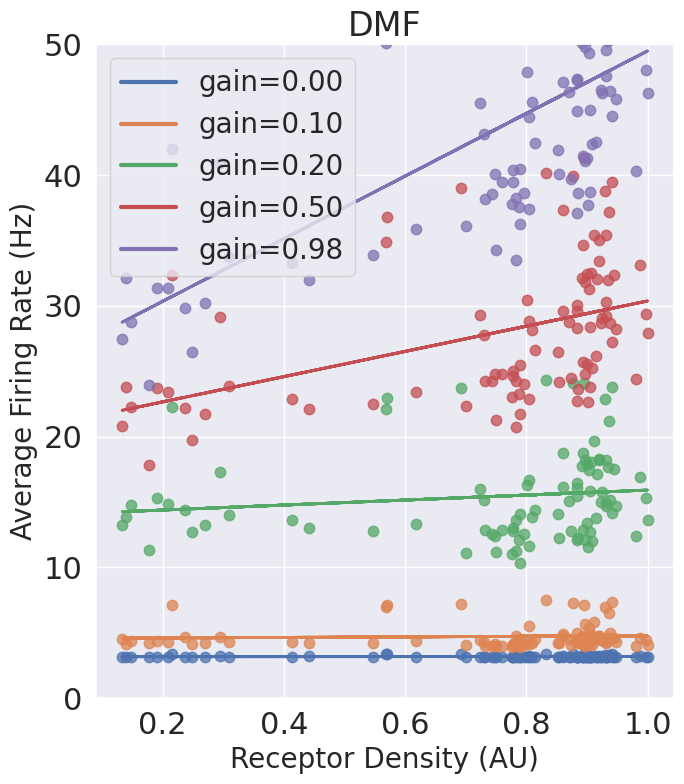

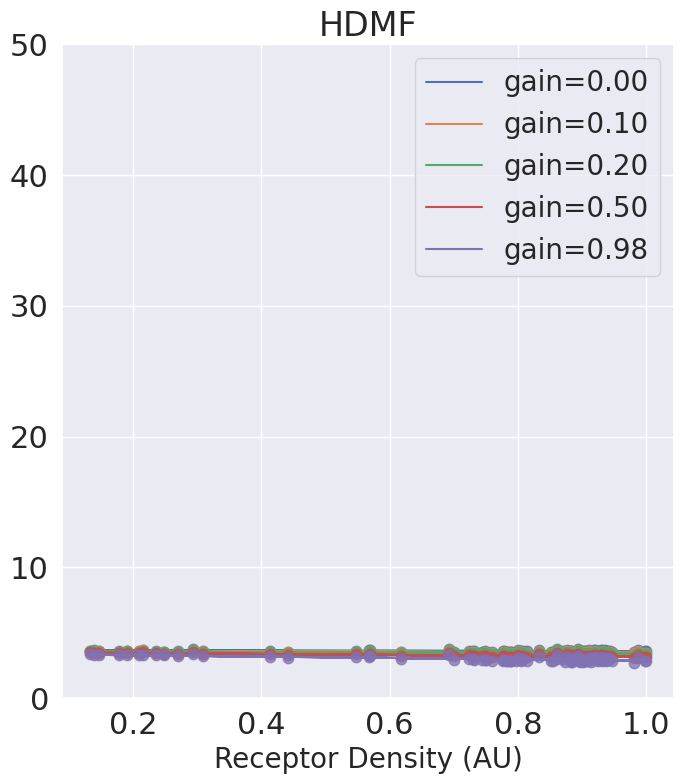

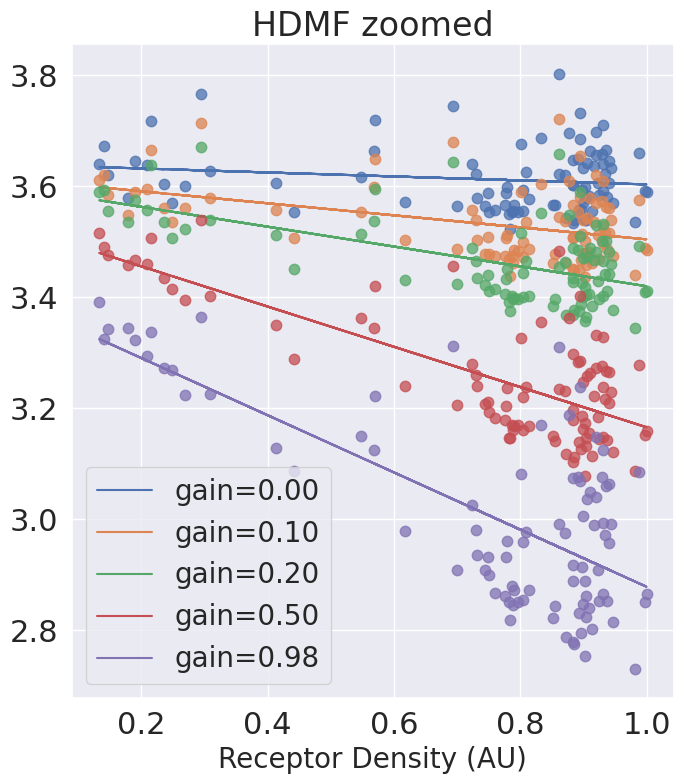

In [19]:

sns.set_style("darkgrid")
# Parameters
titles = ['DMF', 'HDMF','Mixed']
lr_vals = np.logspace(0, 2.46, 10)
alpha_vals = [0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05]
receptors = RECEPTORS
gains2plot = [0, 10, 20, 50, 98]
nm_2_plot = [7, 2,7]  # Indices for DMF, HDMF, Mixed
figname = 'FIG_4'

# Figure 1: DMF
fig1 = plt.figure(figsize=(7, 8))
for g in gains2plot:
    # Scatter plot
    plot, = plt.plot(receptors,
                     nm_mean_fr[0][nm_2_plot[0], g, :],
                     '.',
                     markersize=15,
                     alpha=0.75)
    # Compute and plot the linear fit with thicker line
    coeffs = np.polyfit(np.squeeze(receptors),
                        nm_mean_fr[0][nm_2_plot[0], g, :],
                        1)
    linear_fit = np.poly1d(coeffs)
    plt.plot(receptors,
             linear_fit(receptors),
             '-',
             color=plot.get_color(),
             linewidth=2,          # make line thicker
             label=f'gain={g/100:.2f}')

plt.xlabel('Receptor Density (AU)', fontsize=LABEL)
plt.ylabel('Average Firing Rate (Hz)', fontsize=LABEL)
plt.title(titles[0], fontsize=TITLE+2)
plt.xticks(fontsize=TICKS+2)
plt.yticks(fontsize=TICKS+2)
plt.ylim([0, 50])

# Draw legend and thicken its lines
leg = plt.legend(fontsize=LEGEND)
for legline in leg.get_lines():
    legline.set_linewidth(3)

plt.tight_layout()
plt.show()

# Save FIG_3A
fig1.savefig(figfold / (figname + '_DMF.svg'), dpi=300)
fig1.savefig(figfold / (figname + '_DMF.png'), dpi=300)



# Figure 2: HDMF
fig2 = plt.figure(figsize=(7, 8))
for g in gains2plot:
    # Scatter plot
    plot, = plt.plot(receptors, nm_mean_fr[1][nm_2_plot[1], g, :], '.', markersize=15, alpha=0.75)
    
    # Compute and plot the linear fit
    coeffs = np.polyfit(np.squeeze(receptors), nm_mean_fr[1][nm_2_plot[1], g, :], 1)
    linear_fit = np.poly1d(coeffs)
    plt.plot(receptors, linear_fit(receptors), '-', color=plot.get_color(), 
             label=f'gain={g/100:.2f}')

plt.xlabel('Receptor Density (AU)', fontsize=LABEL)
plt.title(titles[1], fontsize=TITLE+2)
# Put the same range for both y-axes
plt.ylim([0, 50])
plt.xticks(fontsize=TICKS+2)
plt.yticks(fontsize=TICKS+2)
plt.legend(fontsize=LEGEND)
plt.tight_layout()
plt.show()

# Save FIG_3B
fig2.savefig(figfold / (figname + '_HDMF.svg'), dpi=300)
fig2.savefig(figfold / (figname + '_HDMF.png'), dpi=300)

# Figure 2: HDMF
fig3 = plt.figure(figsize=(7, 8))
for g in gains2plot:
    # Scatter plot
    plot, = plt.plot(receptors, nm_mean_fr[1][nm_2_plot[1], g, :], '.', markersize=15, alpha=0.75)
    
    # Compute and plot the linear fit
    coeffs = np.polyfit(np.squeeze(receptors), nm_mean_fr[1][nm_2_plot[1], g, :], 1)
    linear_fit = np.poly1d(coeffs)
    plt.plot(receptors, linear_fit(receptors), '-', color=plot.get_color(), 
             label=f'gain={g/100:.2f}')

plt.xlabel('Receptor Density (AU)', fontsize=LABEL)
plt.title(titles[1] + ' zoomed', fontsize=TITLE+2)
plt.xticks(fontsize=TICKS+2)
plt.yticks(fontsize=TICKS+2)
plt.legend(fontsize=LEGEND)
plt.tight_layout()
plt.show()

# Save FIG_3B
fig3.savefig(figfold / (figname + '_HDMF_zoomed.svg'), dpi=300)
fig3.savefig(figfold / (figname + '_HDMF_zoomed.png'), dpi=300)

## Supplementary 

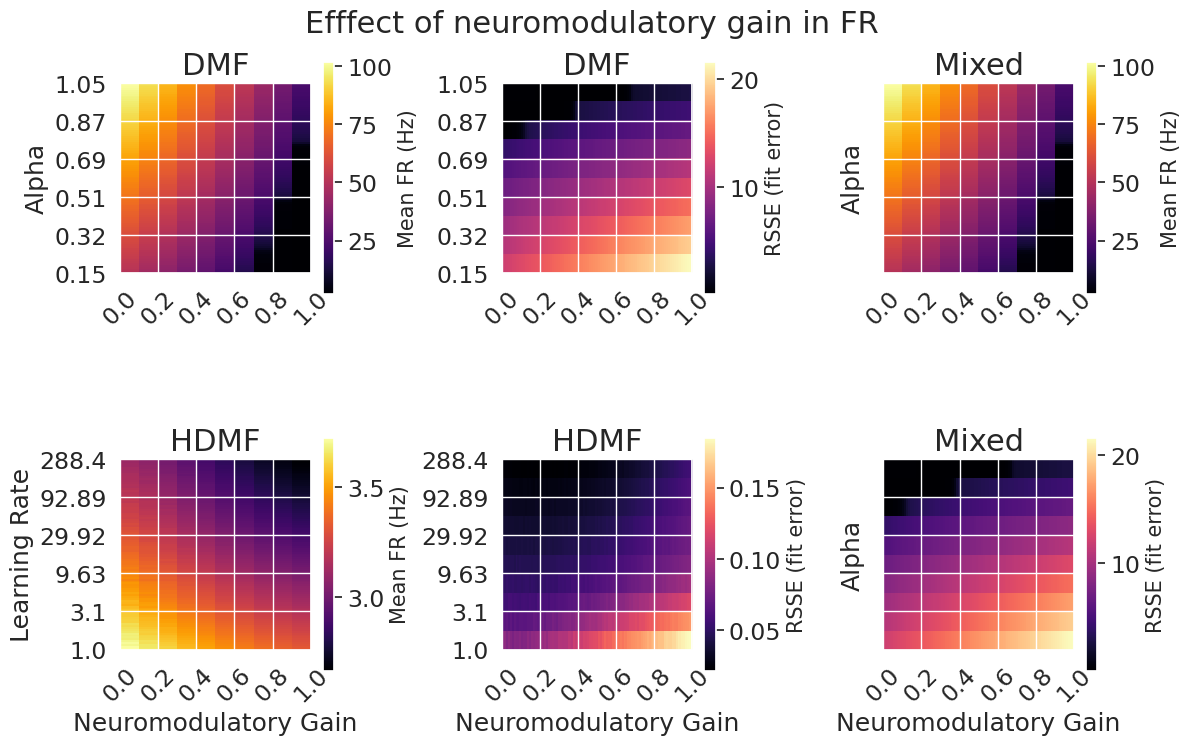

In [20]:
import matplotlib.pyplot as plt
import numpy as np


# Parameters
figname = 'Supp_2_with_Mixed'

titles = ['DMF', 'HDMF', 'Mixed']
yticks = [
    np.floor(np.linspace(0.15, 1.05, 6) * 100) / 100,
    np.floor(np.logspace(0, 2.46, 6) * 100) / 100,
    []
]
ylabel = ['Alpha', 'Learning Rate']

sse_rec_fr = [np.vstack([s_out[1], d_out[1], m_out[1]])
               for s_out, d_out, m_out in zip(polyfit_out_static, polyfit_out_dyn, polyfit_out_mixed)]

# Build mean firing rate grids (n_LR × n_gains) and SSE error grids
mean_fr_stack = np.array([nm_mean_fr[m].mean(axis=2) for m in range(3)])  # shape (3, n_LR, n_gains)
sse_rec_fr_rs = np.dstack((sse_rec_fr))  # shape (3, n_gains, n_LR)

# 1) compute RMSE per region
n_regions = nm_mean_fr[0].shape[-1]          # e.g. 200
rmse_rec_fr = [np.sqrt(s_grid / n_regions)   # s_grid shape (3,n_LR)
               for s_grid in sse_rec_fr]     
# 2) stack into (3, n_gains, n_LR) for plotting
rmse_rec_fr_rs = np.dstack(rmse_rec_fr)

# 3) update vmin/vmax for RMSE heatmaps
sse_vmin = [arr.min() for arr in rmse_rec_fr_rs.reshape(3, -1)]
sse_vmax = [arr.max() for arr in rmse_rec_fr_rs.reshape(3, -1)]


# Set dynamic display ranges
fr_vmin = [arr.min() for arr in mean_fr_stack]
fr_vmax = [arr.max() for arr in mean_fr_stack]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
# — DMF (column 0) —
ax = axes[0, 0]
im = ax.imshow(mean_fr_stack[0].T, origin='lower',
               vmin=fr_vmin[0], vmax=fr_vmax[0],
               cmap='inferno', interpolation='none',
               extent=(0, 100, 0, 100))
ax.set_title(titles[0], fontsize=TITLE)
cbar = fig.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('Mean FR (Hz)', fontsize=COLORBAR-5)
cbar.ax.tick_params(labelsize=TICKS-3)
ax.set_yticks(np.linspace(0, 100, 6))
ax.set_yticklabels(yticks[0], fontsize=TICKS-3)
ax.set_ylabel(ylabel[0], fontsize=LABEL-2)
ax.set_xticks(np.linspace(0, 100, 6))
ax.set_xticklabels(np.linspace(0, 100, 6) / 100, fontsize=TICKS-3,rotation=45)

ax = axes[0, 1]
im = ax.imshow(rmse_rec_fr_rs[0].T, origin='lower',
               vmin=sse_vmin[0], vmax=sse_vmax[0],
               cmap='magma', interpolation='none',
               extent=(0, 100, 0, 100))
ax.set_title(titles[0], fontsize=TITLE)
cbar = fig.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('RSSE (fit error)', fontsize=COLORBAR-5)
cbar.ax.tick_params(labelsize=TICKS-3)
ax.set_yticks(np.linspace(0, 100, 6))
ax.set_yticklabels(yticks[0], fontsize=TICKS-3)
ax.set_xticks(np.linspace(0, 100, 6))
ax.set_xticklabels(np.linspace(0, 100, 6) / 100, fontsize=TICKS-3,rotation=45)


# — HDMF (column 1) —
ax = axes[1, 0]
im = ax.imshow(mean_fr_stack[1].T, origin='lower',
               vmin=fr_vmin[1], vmax=fr_vmax[1],
               cmap='inferno', interpolation='none',
               extent=(0, 100, 0, 100))
ax.set_title(titles[1], fontsize=TITLE)
cbar = fig.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('Mean FR (Hz)', fontsize=COLORBAR-5)
cbar.ax.tick_params(labelsize=TICKS-3)
ax.set_ylabel(ylabel[1], fontsize=LABEL-2)
ax.set_yticks(np.linspace(0, 100, 6))
ax.set_yticklabels(yticks[1], fontsize=TICKS-3)
ax.set_xticks(np.linspace(0, 100, 6))
ax.set_xticklabels(np.linspace(0, 100, 6) / 100, fontsize=TICKS-3,rotation=45)
ax.set_xlabel('Neuromodulatory Gain', fontsize=LABEL-2)

ax = axes[1, 1]
im = ax.imshow(rmse_rec_fr_rs[1].T, origin='lower',
               vmin=sse_vmin[1], vmax=sse_vmax[1],
               cmap='magma', interpolation='none',
               extent=(0, 100, 0, 100))
ax.set_title(titles[1], fontsize=TITLE)
cbar = fig.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('RSSE (fit error)', fontsize=COLORBAR-5)
cbar.ax.tick_params(labelsize=TICKS-3)
ax.set_yticks(np.linspace(0, 100, 6))
ax.set_yticklabels(yticks[1], fontsize=TICKS-3)
ax.set_xticks(np.linspace(0, 100, 6))
ax.set_xticklabels(np.linspace(0, 100, 6) / 100, fontsize=TICKS-3,rotation=45)
ax.set_xlabel('Neuromodulatory Gain', fontsize=LABEL-2)

# — Mixed (column 2) —
ax = axes[0, 2]
im = ax.imshow(mean_fr_stack[2].T, origin='lower',
               vmin=fr_vmin[2], vmax=fr_vmax[2],
               cmap='inferno', interpolation='none',
               extent=(0, 100, 0, 100))
ax.set_title(titles[2], fontsize=TITLE)
cbar = fig.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('Mean FR (Hz)', fontsize=COLORBAR-5)
cbar.ax.tick_params(labelsize=TICKS-3)
ax.set_yticks(np.linspace(0, 100, 6))
ax.set_yticklabels(yticks[2], fontsize=TICKS-3)
ax.set_ylabel('Alpha', fontsize=LABEL-2)
ax.set_xticks(np.linspace(0, 100, 6))
ax.set_xticklabels(np.linspace(0, 100, 6) / 100, fontsize=TICKS-3,rotation=45)

ax = axes[1, 2]
im = ax.imshow(rmse_rec_fr_rs[2].T, origin='lower',
               vmin=sse_vmin[2], vmax=sse_vmax[2],
               cmap='magma', interpolation='none',
               extent=(0, 100, 0, 100))
ax.set_title(titles[2], fontsize=TITLE)
cbar = fig.colorbar(im, ax=ax, shrink=0.7)
cbar.set_label('RSSE (fit error)', fontsize=COLORBAR-5)
cbar.ax.tick_params(labelsize=TICKS-3)
ax.set_yticks(np.linspace(0, 100, 6))
ax.set_yticklabels(yticks[2], fontsize=TICKS-3)
ax.set_ylabel('Alpha', fontsize=LABEL-2)
ax.set_xticks(np.linspace(0, 100, 6))
ax.set_xticklabels(np.linspace(0, 100, 6) / 100, fontsize=TICKS-3,rotation=45)
ax.set_xlabel('Neuromodulatory Gain', fontsize=LABEL-2)

plt.tight_layout()
fig.suptitle('Efffect of neuromodulatory gain in FR', fontsize=TITLE)
fig.savefig(figfold / (figname + '_MeanSSE.svg'), dpi=300)
fig.savefig(figfold / (figname + '_MeanSSE.png'), dpi=300)
plt.show()

# Fig 4

In [21]:
exp_runs = ExperimentManager(project_root, experiment_id="Simple_runs", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_runs = exp_runs.load_experiment_results()

2025-12-19 16:30:54,617 - hdmf_experiment_Simple_runs - INFO - Experiment 'Simple_runs' initialized
2025-12-19 16:30:54,619 - hdmf_experiment_Simple_runs - INFO - Config: Test matching TR to Siemens data
2025-12-19 16:30:54,620 - hdmf_experiment_Simple_runs - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/Simple_runs
2025-12-19 16:30:54,639 - hdmf_experiment_Simple_runs - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:30:54,643 - hdmf_experiment_Simple_runs - INFO - Searching for config file: Simple_runs.yaml
2025-12-19 16:30:54,645 - hdmf_experiment_Simple_runs - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:30:54,654 - hdmf_experiment_Simple_runs - INFO - Simple_runs
2025-12-19 16:30:54,657 - hdmf_experiment_Simple_runs - INFO - Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Simple_runs.yaml')

2025-12-19 16:30:54,678 - hdmf_experiment_Simple_runs - INFO - Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Simple_runs.yaml


INFO: Searching for config file: Simple_runs.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Simple_runs
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Simple_runs.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Simple_runs.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


In [22]:


rates = res_runs['full_results']['observables']['raw_rates'].flatten()
fics = res_runs['full_results']['observables']['raw_fic'].flatten()
element_shape = res_runs['full_results']['observables']['raw_rates'].flatten()[0].shape
tasks = exp_runs.current_config['tasks_list']
nreps = len(tasks)
#rates = np.reshape(res_runs['full_results']['observables']['raw_rates'].flatten(), (nreps, *element_shape))
sel_low = 9
sel_med = 10
sel_high = 11
low_g = rates[sel_low]
med_g = rates[sel_med]
high_g = rates[sel_high]
e_rates_tseries = np.stack((low_g, med_g, high_g), axis=0)
low_g = fics[sel_low]
med_g = fics[sel_med]
high_g = fics[sel_high]
fic_tseries = np.stack((low_g, med_g, high_g), axis=0)
sample_tasks = [tasks[sel_low], tasks[sel_med], tasks[sel_high]]
gvals_tseries = [t['G'] for t in sample_tasks]
lrvals_tseries = [t['lrj'] for t in sample_tasks]



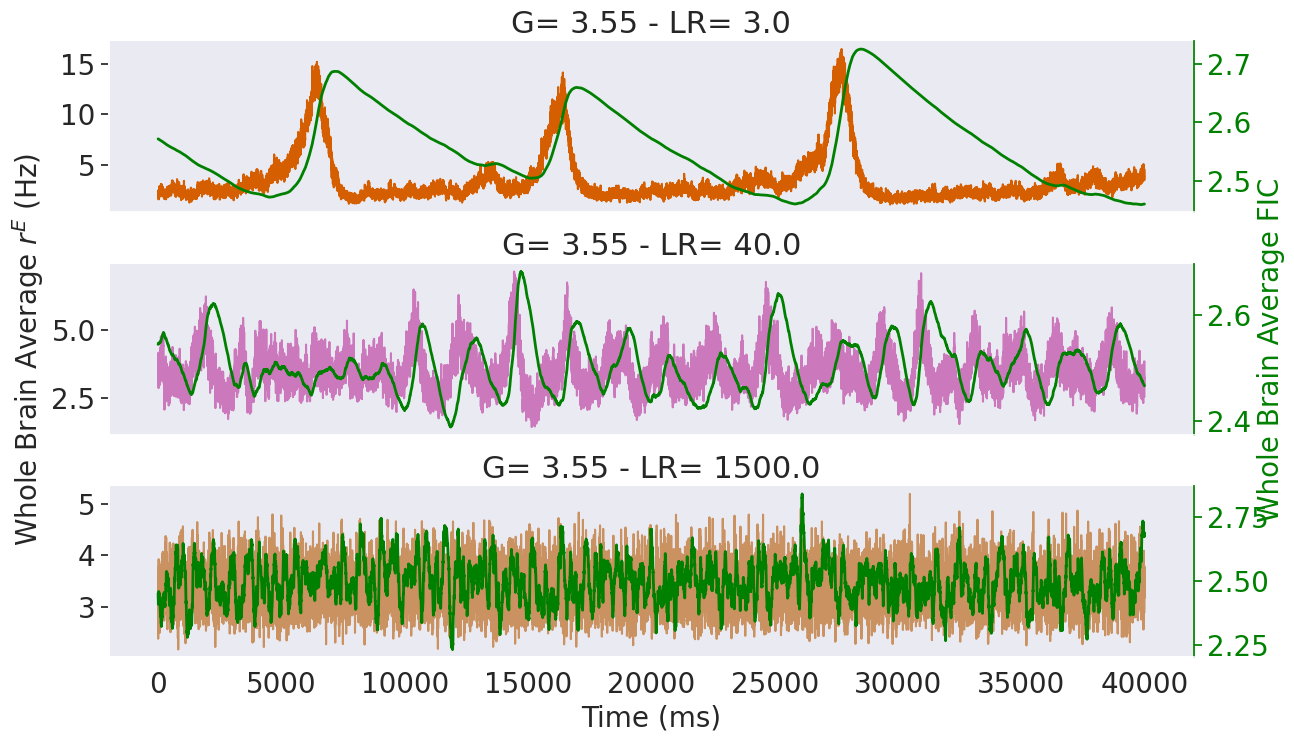

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Parameters
max_t = 40000
acor_tbase = np.arange(0, max_t)
figname = 'FIG_5'
sns.set_style("dark")
col_pal = sns.color_palette("colorblind")

# Create the figure with improved spacing
fig, axes = plt.subplots(3, 1, figsize=(14, 8), gridspec_kw={'hspace': 0.3})

for e in range(3):
    ax = axes[e]
    ax.plot(acor_tbase, np.mean(e_rates_tseries[e, :, :max_t], axis=0), color=col_pal[3 + e])

    # Create a twin Axes for the right y-axis
    ax2 = ax.twinx()
    ax2.plot(acor_tbase, np.mean(fic_tseries[e, :, :max_t], axis=0), color='green', linewidth=2)

    # Labels and Titles
    if e==1:
        ax.set_ylabel(r'Whole Brain Average $r^E$ (Hz)', fontsize=LABEL)
        ax2.set_ylabel(r'Whole Brain Average FIC', fontsize=LABEL, color='green')

    ax.set_title(f'G= {gvals_tseries[e]} - LR= {lrvals_tseries[e]}', fontsize=TITLE)

    # Customize the right y-axis ticks and line color
    ax2.yaxis.set_tick_params(color='green', labelcolor='green', labelsize=TICKS)
    ax2.spines['right'].set_color('green')

    # Hide x-axis ticks for the first two plots
    if e == 2:
        ax.set_xlabel('Time (ms)', fontsize=LABEL)
    else:
        ax.set_xticks([])

    # Axes properties
    ax.tick_params(axis='both', labelsize=TICKS)
    ax2.tick_params(axis='y', labelsize=TICKS)
    ax.spines['top'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(e == 2)  # Bottom spine visible only for the last plot

#plt.tight_layout()

# Save the figure
fig.savefig(figfold / (figname + '_A.png'), dpi=300)
fig.savefig(figfold / (figname + '_A.svg'), dpi=300)
plt.show()


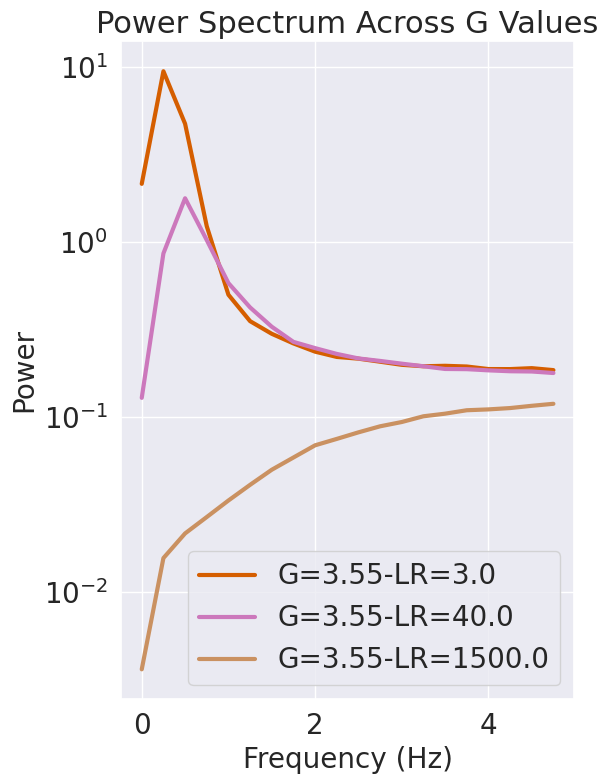

In [24]:
from scipy.signal import find_peaks, correlate,welch


def get_max_freq_and_power(rates):
    freqs, psd = welch(rates, fs=1000,axis=1,nperseg=4*1000,noverlap=2*1000)
    max_freq_id = np.argmax(psd[:,:100],axis=1)
    max_freqs = freqs[max_freq_id]
    max_power = np.max(psd[:,:100],axis=1)
    return max_freqs, max_power,freqs,psd

# Parameters
figname = 'FIG_5_B'
sns.set_style("darkgrid")
# Create the figure
fig, ax = plt.subplots(figsize=(6, 8))

# Plot power spectra for different G values using semilogy
for i in range(3):
    freq, power, f, p = get_max_freq_and_power(e_rates_tseries[i])
    ax.semilogy(f[:20], (p[:, :20].T).mean(axis=1),
                label=f'G={gvals_tseries[i]}-LR={lrvals_tseries[i]}',
                color=col_pal[3 + i], linewidth=3)

# Labels, title, and ticks
ax.set_xlabel('Frequency (Hz)', fontsize=LABEL)
ax.set_ylabel('Power', fontsize=LABEL)
ax.set_title('Power Spectrum Across G Values', fontsize=TITLE)
ax.tick_params(axis='both', labelsize=TICKS)

# Add legend
ax.legend(fontsize=LEGEND)

# Layout and save
plt.tight_layout()
fig.savefig(figfold / (figname + '.png'), dpi=300)
fig.savefig(figfold / (figname + '.svg'), dpi=300)
plt.show()


## SW GRID

In [26]:
experiment_manager = ExperimentManager(project_root, experiment_id="SW_Grid", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res = experiment_manager.load_experiment_results()

2025-12-19 16:31:52,214 - hdmf_experiment_SW_Grid - INFO - Experiment 'SW_Grid' initialized
2025-12-19 16:31:52,215 - hdmf_experiment_SW_Grid - INFO - Config: Slow wave grid search test
2025-12-19 16:31:52,216 - hdmf_experiment_SW_Grid - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/SW_Grid
2025-12-19 16:31:52,236 - hdmf_experiment_SW_Grid - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0


2025-12-19 16:31:52,241 - hdmf_experiment_SW_Grid - INFO - Searching for config file: SW_Grid.yaml
2025-12-19 16:31:52,243 - hdmf_experiment_SW_Grid - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:31:52,252 - hdmf_experiment_SW_Grid - INFO - SW_Grid
2025-12-19 16:31:52,254 - hdmf_experiment_SW_Grid - INFO - Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/SW_Grid.yaml')]
2025-12-19 16:31:52,270 - hdmf_experiment_SW_Grid - INFO - Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/SW_Grid.yaml


INFO: Searching for config file: SW_Grid.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: SW_Grid
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/SW_Grid.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/SW_Grid.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


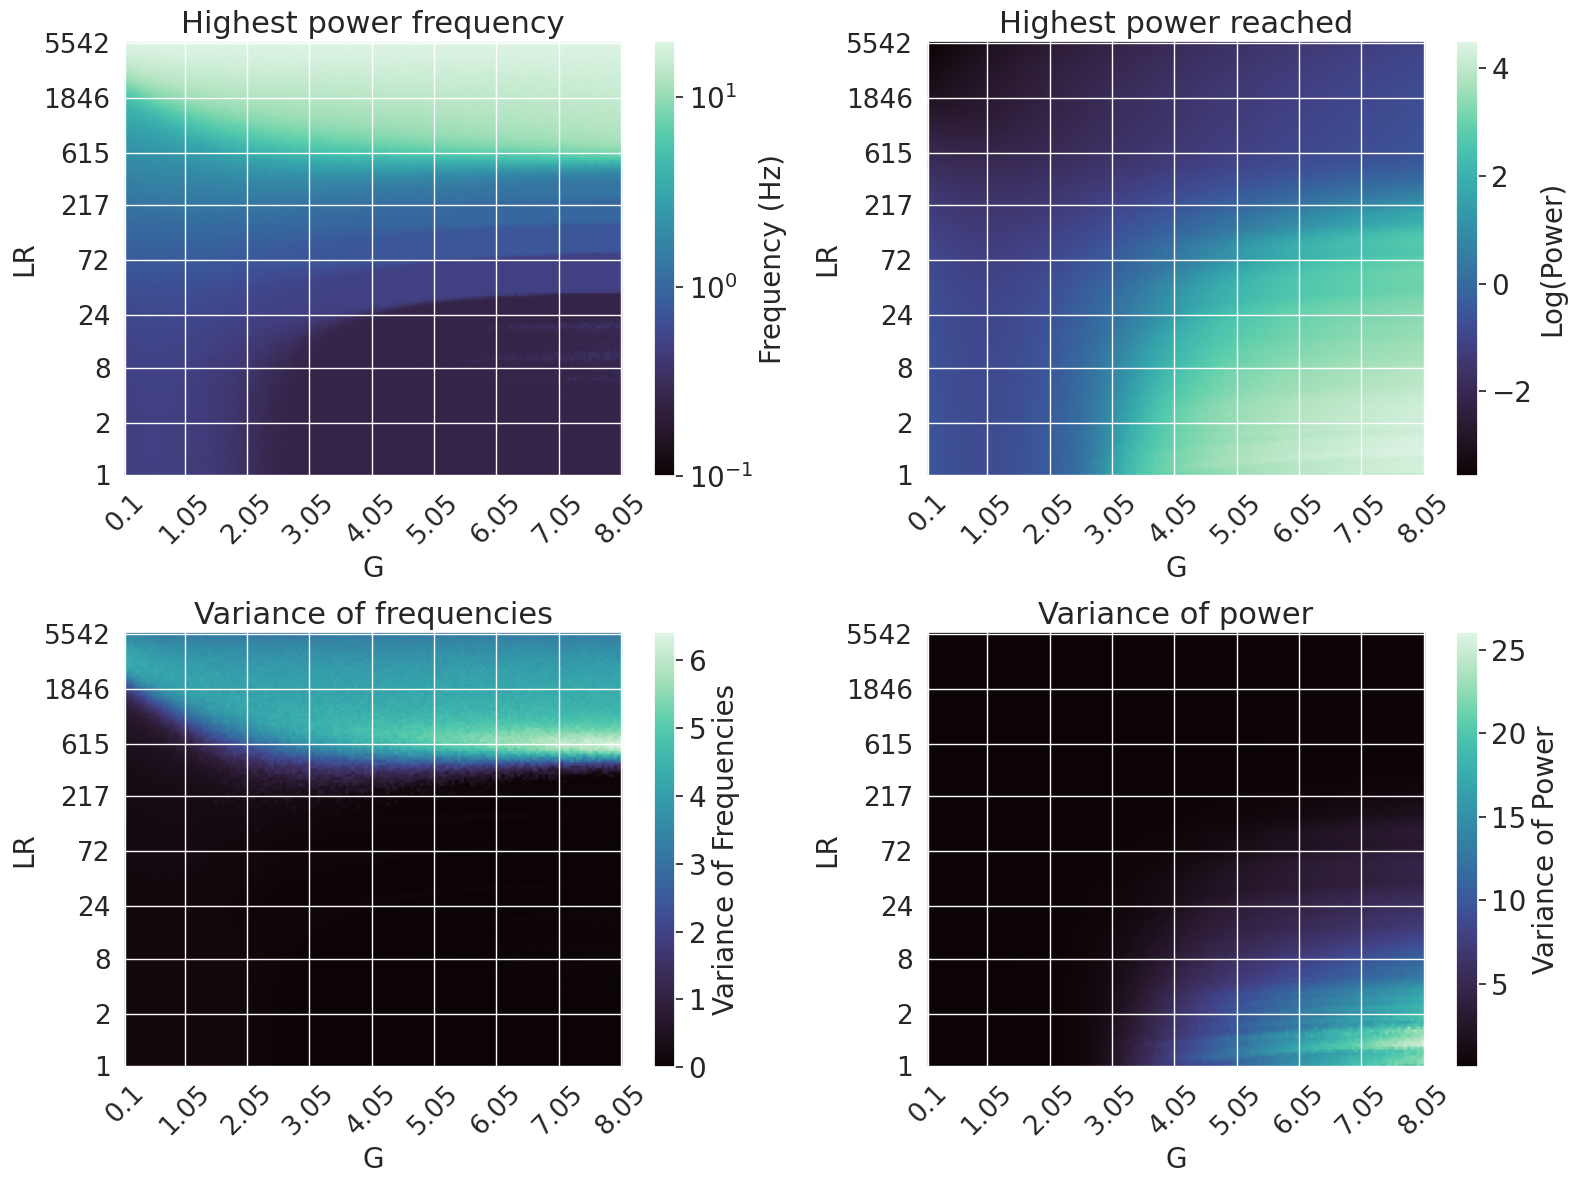

In [27]:

figname_base = 'FIG_5_'

# Create figure
fig, axs = plt.subplots(2, 2, figsize=(16, 12))


LR_limit = 150
# Define G and LR ranges

G_range = res['full_results']['axis_values']['G']
LR_range = res['full_results']['axis_values']['lrj'][:LR_limit]
freq_mean = np.mean(res['full_results']['observables']['max_freqs_rates'][ :LR_limit, :, :, :], axis=(2, 3))

freq_std = np.std(res['full_results']['observables']['max_freqs_rates'][ :LR_limit,:, :, :], axis=(2, 3))
power_mean = np.mean(res['full_results']['observables']['max_power_rates'][ :LR_limit,:, :, :], axis=(2, 3))
power_std = np.std(res['full_results']['observables']['max_power_rates'][ :LR_limit,:, :, :], axis=(2, 3))
# Define tick indices and labels
lr_tick_indices = np.linspace(0, len(LR_range) - 1, 9, dtype=int)
lr_tick_labels = np.round(LR_range[lr_tick_indices], 2)
G_tick_indices = np.linspace(0, len(G_range) - 1, 9, dtype=int)
G_tick_labels = np.round(G_range[G_tick_indices], 2)

col_pal_sw_asynch = ['#C9B037', '#6C5B7B']

# Top-left: Highest power frequency (Log Normalization)
im1 = axs[0, 0].imshow(freq_mean, aspect='auto', cmap='mako',
                       norm=LogNorm(vmin=0.1, vmax=freq_mean.max()),
                       origin='upper')
cbar1 = fig.colorbar(im1, ax=axs[0, 0])
cbar1.minorticks_off()
cbar1.set_label('Frequency (Hz)', fontsize=COLORBAR)
cbar1.ax.tick_params(labelsize=TICKS)

axs[0, 0].set_xticks(G_tick_indices)
axs[0, 0].set_xticklabels(G_tick_labels, fontsize=TICKS-1,rotation=45)
axs[0, 0].set_yticks(lr_tick_indices)
axs[0, 0].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS-1)
axs[0, 0].invert_yaxis()
axs[0, 0].set_xlabel('G', fontsize=LABEL)
axs[0, 0].set_ylabel('LR', fontsize=LABEL)
axs[0, 0].set_title('Highest power frequency', fontsize=TITLE)

# Top-right: Highest power reached (Log scale)
im2 = axs[0, 1].imshow(np.log(power_mean), aspect='auto', cmap='mako', origin='upper')
cbar2 = fig.colorbar(im2, ax=axs[0, 1])
cbar2.set_label('Log(Power)', fontsize=COLORBAR)
cbar2.ax.tick_params(labelsize=TICKS)

axs[0, 1].set_xticks(G_tick_indices)
axs[0, 1].set_xticklabels(G_tick_labels, fontsize=TICKS-1,rotation=45)
axs[0, 1].set_yticks(lr_tick_indices)
axs[0, 1].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS-1)
axs[0, 1].invert_yaxis()
axs[0, 1].set_xlabel('G', fontsize=LABEL)
axs[0, 1].set_ylabel('LR', fontsize=LABEL)
axs[0, 1].set_title('Highest power reached', fontsize=TITLE)

# Bottom-left: Variance of frequencies
im3 = axs[1, 0].imshow(freq_std, aspect='auto', cmap='mako', origin='upper')
cbar3 = fig.colorbar(im3, ax=axs[1, 0])
cbar3.set_label('Variance of Frequencies', fontsize=COLORBAR)
cbar3.ax.tick_params(labelsize=TICKS)

axs[1, 0].set_xticks(G_tick_indices)
axs[1, 0].set_xticklabels(G_tick_labels, fontsize=TICKS-1,rotation=45)
axs[1, 0].set_yticks(lr_tick_indices)
axs[1, 0].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS-1)
axs[1, 0].invert_yaxis()
axs[1, 0].set_xlabel('G', fontsize=LABEL)
axs[1, 0].set_ylabel('LR', fontsize=LABEL)
axs[1, 0].set_title('Variance of frequencies', fontsize=TITLE)

# Bottom-right: Variance of power
im4 = axs[1, 1].imshow(power_std, aspect='auto', cmap='mako', origin='upper')
cbar4 = fig.colorbar(im4, ax=axs[1, 1])
cbar4.set_label('Variance of Power', fontsize=COLORBAR)
cbar4.ax.tick_params(labelsize=TICKS)

axs[1, 1].set_xticks(G_tick_indices)
axs[1, 1].set_xticklabels(G_tick_labels, fontsize=TICKS-1,rotation=45)
axs[1, 1].set_yticks(lr_tick_indices)
axs[1, 1].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS-1)
axs[1, 1].invert_yaxis()
axs[1, 1].set_xlabel('G', fontsize=LABEL)
axs[1, 1].set_ylabel('LR', fontsize=LABEL)
axs[1, 1].set_title('Variance of power', fontsize=TITLE)

plt.tight_layout()
fig.savefig(figfold / (figname_base + 'Combined.png'), dpi=300)
fig.savefig(figfold / (figname_base + 'Combined.svg'), dpi=300)
plt.show()

### FIC SW

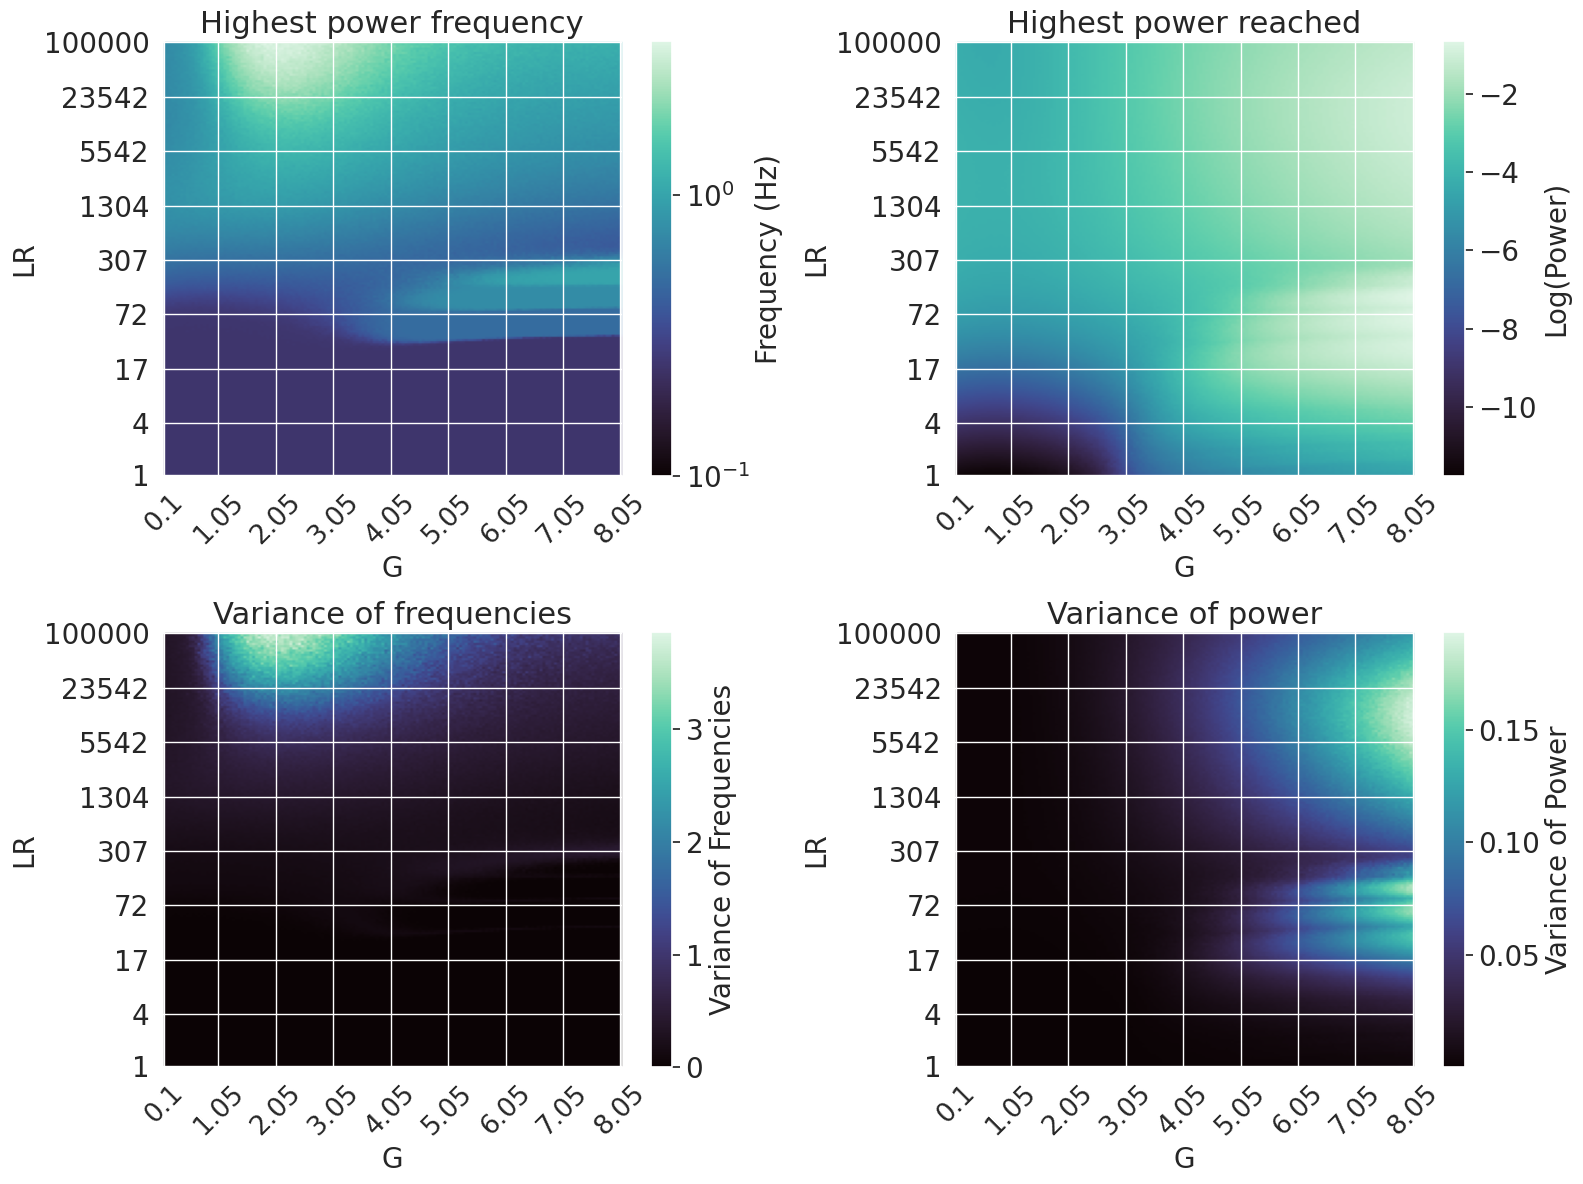

In [28]:


figname_base = 'SUPP_FIG_5'

# Create figure
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Define G and LR ranges

G_range = res['full_results']['axis_values']['G']
LR_range = res['full_results']['axis_values']['lrj']
freq_mean = np.mean(res['full_results']['observables']['max_freqs_fic'], axis=(2, 3))
freq_std = np.std(res['full_results']['observables']['max_freqs_fic'], axis=(2, 3))
power_mean = np.mean(res['full_results']['observables']['max_power_fic'], axis=(2, 3))
power_std = np.std(res['full_results']['observables']['max_power_fic'], axis=(2, 3))
# Define tick indices and labels
lr_tick_indices = np.linspace(0, len(LR_range) - 1, 9, dtype=int)
lr_tick_labels = np.round(LR_range[lr_tick_indices], 2)
G_tick_indices = np.linspace(0, len(G_range) - 1, 9, dtype=int)
G_tick_labels = np.round(G_range[G_tick_indices], 2)

col_pal_sw_asynch = ['#C9B037', '#6C5B7B']

# Top-left: Highest power frequency (Log Normalization)
im1 = axs[0, 0].imshow(freq_mean, aspect='auto', cmap='mako',
                       norm=LogNorm(vmin=0.1, vmax=freq_mean.max()),
                       origin='upper')
cbar1 = fig.colorbar(im1, ax=axs[0, 0])
cbar1.minorticks_off()
cbar1.set_label('Frequency (Hz)', fontsize=COLORBAR)
cbar1.ax.tick_params(labelsize=TICKS)

# Add example region annotations
"""
G_3_idx = np.argmin(np.abs(G_range - 3))
G_16_idx = np.argmin(np.abs(G_range - 15))
lr_100_idx = np.argmin(np.abs(LR_range - 150))
rect = Rectangle(
    (G_3_idx, lr_100_idx - 0.5),
    G_16_idx - G_3_idx,
    1,
    linewidth=1,
    edgecolor=col_pal_sw_asynch[0],
    facecolor='none'
)
axs[0, 0].add_patch(rect)
axs[0, 0].text(14.5, lr_100_idx, 'Example SW region', 
               color=col_pal_sw_asynch[0], fontsize=LABEL-4, verticalalignment='top')

lr_1000_idx = np.argmin(np.abs(LR_range - 10150))
rect_asynch = Rectangle(
    (G_3_idx, lr_1000_idx - 0.5),
    G_16_idx - G_3_idx,
    1,
    linewidth=1,
    edgecolor=col_pal_sw_asynch[1],
    facecolor='none'
)
axs[0, 0].add_patch(rect_asynch)
axs[0, 0].text(14.5, lr_1000_idx, 'Example Asynch region', 
               color=col_pal_sw_asynch[1], fontsize=LABEL-4, verticalalignment='top')
"""
axs[0, 0].set_xticks(G_tick_indices)
axs[0, 0].set_xticklabels(G_tick_labels, fontsize=TICKS-1,rotation=45)
axs[0, 0].set_yticks(lr_tick_indices)
axs[0, 0].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS)
axs[0, 0].invert_yaxis()
axs[0, 0].set_xlabel('G', fontsize=LABEL)
axs[0, 0].set_ylabel('LR', fontsize=LABEL)
axs[0, 0].set_title('Highest power frequency', fontsize=TITLE)

# Top-right: Highest power reached (Log scale)
im2 = axs[0, 1].imshow(np.log(power_mean), aspect='auto', cmap='mako', origin='upper')
cbar2 = fig.colorbar(im2, ax=axs[0, 1])
cbar2.set_label('Log(Power)', fontsize=COLORBAR)
cbar2.ax.tick_params(labelsize=TICKS)

axs[0, 1].set_xticks(G_tick_indices)
axs[0, 1].set_xticklabels(G_tick_labels, fontsize=TICKS-1,rotation=45)
axs[0, 1].set_yticks(lr_tick_indices)
axs[0, 1].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS)
axs[0, 1].invert_yaxis()
axs[0, 1].set_xlabel('G', fontsize=LABEL)
axs[0, 1].set_ylabel('LR', fontsize=LABEL)
axs[0, 1].set_title('Highest power reached', fontsize=TITLE)

# Bottom-left: Variance of frequencies
im3 = axs[1, 0].imshow(freq_std, aspect='auto', cmap='mako', origin='upper')
cbar3 = fig.colorbar(im3, ax=axs[1, 0])
cbar3.set_label('Variance of Frequencies', fontsize=COLORBAR)
cbar3.ax.tick_params(labelsize=TICKS)

axs[1, 0].set_xticks(G_tick_indices)
axs[1, 0].set_xticklabels(G_tick_labels, fontsize=TICKS-1,rotation=45)
axs[1, 0].set_yticks(lr_tick_indices)
axs[1, 0].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS)
axs[1, 0].invert_yaxis()
axs[1, 0].set_xlabel('G', fontsize=LABEL)
axs[1, 0].set_ylabel('LR', fontsize=LABEL)
axs[1, 0].set_title('Variance of frequencies', fontsize=TITLE)

# Bottom-right: Variance of power
im4 = axs[1, 1].imshow(power_std, aspect='auto', cmap='mako', origin='upper')
cbar4 = fig.colorbar(im4, ax=axs[1, 1])
cbar4.set_label('Variance of Power', fontsize=COLORBAR)
cbar4.ax.tick_params(labelsize=TICKS)

axs[1, 1].set_xticks(G_tick_indices)
axs[1, 1].set_xticklabels(G_tick_labels, fontsize=TICKS-1,rotation=45)
axs[1, 1].set_yticks(lr_tick_indices)
axs[1, 1].set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS)
axs[1, 1].invert_yaxis()
axs[1, 1].set_xlabel('G', fontsize=LABEL)
axs[1, 1].set_ylabel('LR', fontsize=LABEL)
axs[1, 1].set_title('Variance of power', fontsize=TITLE)

plt.tight_layout()
fig.savefig(figfold / (figname_base + 'Combined.png'), dpi=300)
fig.savefig(figfold / (figname_base + 'Combined.svg'), dpi=300)
plt.show()

# Fig 5

## Sample series


In [29]:
exp_runs = ExperimentManager(project_root, experiment_id="Simple_runs", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_runs = exp_runs.load_experiment_results()

2025-12-19 16:33:39,340 - hdmf_experiment_Simple_runs - INFO - Experiment 'Simple_runs' initialized
2025-12-19 16:33:39,342 - hdmf_experiment_Simple_runs - INFO - Config: Test matching TR to Siemens data
2025-12-19 16:33:39,343 - hdmf_experiment_Simple_runs - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/Simple_runs


2025-12-19 16:33:39,359 - hdmf_experiment_Simple_runs - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:33:39,362 - hdmf_experiment_Simple_runs - INFO - Searching for config file: Simple_runs.yaml
2025-12-19 16:33:39,363 - hdmf_experiment_Simple_runs - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:33:39,372 - hdmf_experiment_Simple_runs - INFO - Simple_runs
2025-12-19 16:33:39,373 - hdmf_experiment_Simple_runs - INFO - Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Simple_runs.yaml')]
2025-12-19 16:33:39,389 - hdmf_experiment_Simple_runs - INFO - Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Simple_runs.yaml


INFO: Searching for config file: Simple_runs.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Simple_runs
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Simple_runs.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Simple_runs.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


In [30]:
e_rates_dyn_list = np.zeros((2, res_runs['full_results']['observables']['raw_rates'][0][0].shape[0], res_runs['full_results']['observables']['raw_rates'][0][0].shape[1]))
e_rates_dyn_list[0] = res_runs['full_results']['observables']['raw_rates'][-1][0]
e_rates_dyn_list[1] = res_runs['full_results']['observables']['raw_rates'][11][0]

/tmp/ipykernel_3683923/1892549225.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


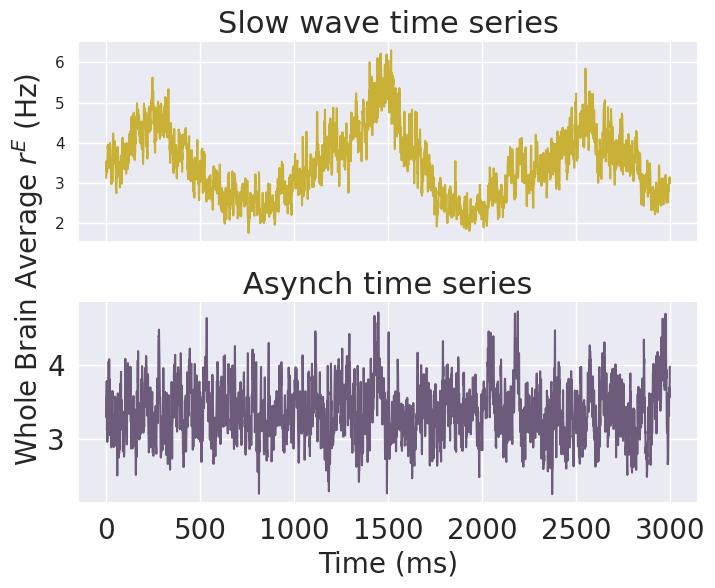

In [31]:

# Font sizes (using notebook variables)
sns.set_style('darkgrid')
max_t = 3000
acor_tbase = np.arange(0, max_t)
figname = 'FIG_6_A'

START = 6000
# Create the figure with two subplots (for LR=100 and LR=10000) at G=0.5
fig, axes = plt.subplots(2, 1, figsize=(8, 6), gridspec_kw={'hspace': 0.3})


ax = axes[0]
# Plot the average excitatory rate for the i-th dyn time series sample
ax.plot(acor_tbase, np.mean(e_rates_dyn_list[0, :, START:START+max_t], axis=0), color=category_colors['SW'])

# Set title with the corresponding LR value and fixed G=0.5
ax.set_title(f'Slow wave time series', fontsize=TITLE)
#ax.set_xticks([])
ax.set_xticklabels([])

ax = axes[1]
ax.plot(acor_tbase, np.mean(e_rates_dyn_list[1, :, START:START+max_t], axis=0), color=category_colors['Asynch'])
ax.set_title(f'Asynch time series', fontsize=TITLE)
ax.set_xlabel('Time (ms)', fontsize=LABEL)
# Hide the top spine
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', labelsize=TICKS)

# Add a shared ylabel in the middle of both subplots
fig.text(0.04, 0.5, r'Whole Brain Average $r^E$ (Hz)', va='center', rotation='vertical', fontsize=LABEL)
plt.tight_layout()
# Save the figure
fig.savefig(figfold / (figname + '.png'), dpi=300)
fig.savefig(figfold / (figname + '.svg'), dpi=300)
plt.show()


## Chimeras


In [32]:
from fastHDMF.experiment_manager import ExperimentManager
from bct import score_wu

C = np.loadtxt(("../data/SCs/Averaged_SCs/aal/healthy_average.csv"),delimiter=',')

C = 0.2*C/np.max(C)
node_strength = np.mean(C,axis=0)
# Get the 10 lowest regions
most_connected = np.argsort(node_strength)[::-1]

score_levels = np.arange(0.02,1.6,0.01)
score_idxs = []
scores = []
sn_s = []
for level in score_levels:
    score, sn = score_wu(C,level)
    # Get the indices from score that have > 0 values
    if sn>0:
        score_idxs.append(np.where(np.sum(score,axis=0) > 0)[0])
        scores.append(score)
        sn_s.append(sn)

G_VAL = 3.55
LR_HOMO = 1500
LR_HET = 1
score_lengths = [len(x) for x in score_idxs]
cherry_pick_scores_idx = [-1,-4,-8,-9]
amount_of_regions = [score_lengths[x] for x in cherry_pick_scores_idx ]

exp_hom_100 = ExperimentManager(project_root, experiment_id="G355_HOMO-100", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_hom_100 = exp_hom_100.load_experiment_results()

exp_hom_1500 = ExperimentManager(project_root, experiment_id="G355_HOMO-1500", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_hom_1500 = exp_hom_1500.load_experiment_results()

exp_hom_100_het_1500_connected = ExperimentManager(project_root, experiment_id="G355_HOMO-100_HET-1500_Connected", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_hom_100_het_1500_connected = exp_hom_100_het_1500_connected.load_experiment_results()

exp_hom_100_het_1500_score = ExperimentManager(project_root, experiment_id="G355_HOMO-100_HET-1500_SCORE", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_hom_100_het_1500_score = exp_hom_100_het_1500_score.load_experiment_results()

exp_hom_100_het_1500_random = ExperimentManager(project_root, experiment_id="G355_HOMO-100_HET-1500_RANDOM", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_hom_100_het_1500_random = exp_hom_100_het_1500_random.load_experiment_results()

hom_100_het_1500_random_selection = exp_hom_100_het_1500_random.current_config['simulation']['selected_regions']

exp_hom_1500_het_100_connected = ExperimentManager(project_root, experiment_id="G355_HOMO-1500_HET-100_Connected", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_hom_1500_het_100_connected = exp_hom_1500_het_100_connected.load_experiment_results()

exp_hom_1500_het_100_score = ExperimentManager(project_root, experiment_id="G355_HOMO-1500_HET-100_SCORE", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_hom_1500_het_100_score = exp_hom_1500_het_100_score.load_experiment_results()

exp_hom_1500_het_100_random = ExperimentManager(project_root, experiment_id="G355_HOMO-1500_HET-100_RANDOM", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res_hom_1500_het_100_random = exp_hom_1500_het_100_random.load_experiment_results()

hom_1500_het_100_random_selection = exp_hom_1500_het_100_random.current_config['simulation']['selected_regions']

max_freqs_all_low_lr = np.squeeze(res_hom_100['full_results']['observables']['max_freqs_rates'])
max_freqs_all_high_lr = np.squeeze(res_hom_1500['full_results']['observables']['max_freqs_rates'])

max_freqs_all_het_100_connected = res_hom_1500_het_100_connected['full_results']['observables']['max_freqs_rates']
max_freqs_all_het_1500_connected = res_hom_100_het_1500_connected['full_results']['observables']['max_freqs_rates']

max_freqs_all_het_100_score = res_hom_1500_het_100_score['full_results']['observables']['max_freqs_rates']
max_freqs_all_het_1500_score = res_hom_100_het_1500_score['full_results']['observables']['max_freqs_rates']

max_freqs_all_het_100_random = res_hom_1500_het_100_random['full_results']['observables']['max_freqs_rates']
max_freqs_all_het_1500_random = res_hom_100_het_1500_random['full_results']['observables']['max_freqs_rates']

n_groups = max_freqs_all_het_1500_connected.shape[0]

quimeric_delta_connected_100 = np.zeros((n_groups, C.shape[0]))

for NTH_IDX in range(n_groups):
    quimeric_delta_connected_100[NTH_IDX] = 2 * (max_freqs_all_het_100_connected[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1

quimeric_delta_connected_1500 = np.zeros((n_groups, C.shape[0]))
for NTH_IDX in range(n_groups):
    quimeric_delta_connected_1500[NTH_IDX] = 2 * (max_freqs_all_het_1500_connected[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1


quimeric_delta_score_100 = np.zeros((n_groups, C.shape[0]))
for NTH_IDX in range(n_groups):
    quimeric_delta_score_100[NTH_IDX] = 2 * (max_freqs_all_het_100_score[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1

quimeric_delta_score_1500 = np.zeros((n_groups, C.shape[0]))
for NTH_IDX in range(n_groups):
    quimeric_delta_score_1500[NTH_IDX] = 2 * (max_freqs_all_het_1500_score[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1



quimeric_delta_random_100 = np.zeros((n_groups, C.shape[0]))
for NTH_IDX in range(n_groups):
    quimeric_delta_random_100[NTH_IDX] = 2 * (max_freqs_all_het_100_random[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1

quimeric_delta_random_1500 = np.zeros((n_groups, C.shape[0]))
for NTH_IDX in range(n_groups):
    quimeric_delta_random_1500[NTH_IDX] = 2 * (max_freqs_all_het_1500_random[NTH_IDX].mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) / (max_freqs_all_high_lr.mean(axis=0) - max_freqs_all_low_lr.mean(axis=0)) - 1

2025-12-19 16:33:45,301 - hdmf_experiment_G355_HOMO-100 - INFO - Experiment 'G355_HOMO-100' initialized
2025-12-19 16:33:45,303 - hdmf_experiment_G355_HOMO-100 - INFO - Config: Running Chimeras with LR_HOM=100
2025-12-19 16:33:45,304 - hdmf_experiment_G355_HOMO-100 - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/G355_HOMO-100
2025-12-19 16:33:45,314 - hdmf_experiment_G355_HOMO-100 - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:33:45,317 - hdmf_experiment_G355_HOMO-100 - INFO - Searching for config file: G355_HOMO-100.yaml
2025-12-19 16:33:45,319 - hdmf_experiment_G355_HOMO-100 - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:33:45,327 - hdmf_experiment_G355_HOMO-100 - INFO - G355_HOMO-100
2025-12-19 16:33:45,328 - hdmf_experiment_G355_HOMO-100 - INFO - Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experi

INFO: Searching for config file: G355_HOMO-100.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: G355_HOMO-100
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-100.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/chimeras/g355_lr100-1500/G355_HOMO-100.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-100.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices
INFO: Searching for config file: G355_HOMO-1500.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: G355_HOMO-1500
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-1500.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/chimeras/g355_lr100-1500/G355_HOMO-1500.y

2025-12-19 16:33:45,476 - hdmf_experiment_G355_HOMO-1500 - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:33:45,486 - hdmf_experiment_G355_HOMO-1500 - INFO - G355_HOMO-1500
2025-12-19 16:33:45,487 - hdmf_experiment_G355_HOMO-1500 - INFO - Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-1500.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/chimeras/g355_lr100-1500/G355_HOMO-1500.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/chimeras/g355_lr1-1500/G355_HOMO-1500.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/chimeras/g355_lr15-1500/G355_HOMO-1500.yaml')]
2025-12-19 16:33:45,497 - hdmf_experiment_G355_HOMO-1500 - INFO - Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-1500.yaml
2025-12-19 16:33:45,648 - hdmf_experiment_G355_

INFO: Searching for config file: G355_HOMO-100_HET-1500_Connected.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: G355_HOMO-100_HET-1500_Connected
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-100_HET-1500_Connected.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/chimeras/g355_lr100-1500/G355_HOMO-100_HET-1500_Connected.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-100_HET-1500_Connected.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


2025-12-19 16:33:46,216 - hdmf_experiment_G355_HOMO-100_HET-1500_SCORE - INFO - Experiment 'G355_HOMO-100_HET-1500_SCORE' initialized
2025-12-19 16:33:46,217 - hdmf_experiment_G355_HOMO-100_HET-1500_SCORE - INFO - Config: Running Chimeras with LR_HOM=100 LR_HET=1500 choosing regions according to SCORE
2025-12-19 16:33:46,219 - hdmf_experiment_G355_HOMO-100_HET-1500_SCORE - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/G355_HOMO-100_HET-1500_SCORE
2025-12-19 16:33:46,237 - hdmf_experiment_G355_HOMO-100_HET-1500_SCORE - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:33:46,242 - hdmf_experiment_G355_HOMO-100_HET-1500_SCORE - INFO - Searching for config file: G355_HOMO-100_HET-1500_SCORE.yaml
2025-12-19 16:33:46,243 - hdmf_experiment_G355_HOMO-100_HET-1500_SCORE - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:33:46,253 - hdmf_experiment_G355_HOMO-100

INFO: Searching for config file: G355_HOMO-100_HET-1500_SCORE.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: G355_HOMO-100_HET-1500_SCORE
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-100_HET-1500_SCORE.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/chimeras/g355_lr100-1500/G355_HOMO-100_HET-1500_SCORE.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-100_HET-1500_SCORE.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


2025-12-19 16:33:46,730 - hdmf_experiment_G355_HOMO-100_HET-1500_RANDOM - INFO - Experiment 'G355_HOMO-100_HET-1500_RANDOM' initialized
2025-12-19 16:33:46,732 - hdmf_experiment_G355_HOMO-100_HET-1500_RANDOM - INFO - Config: Running Chimeras with LR_HOM=100 LR_HET=1500 choosing regions according to RANDOM
2025-12-19 16:33:46,733 - hdmf_experiment_G355_HOMO-100_HET-1500_RANDOM - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/G355_HOMO-100_HET-1500_RANDOM
2025-12-19 16:33:46,748 - hdmf_experiment_G355_HOMO-100_HET-1500_RANDOM - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:33:46,752 - hdmf_experiment_G355_HOMO-100_HET-1500_RANDOM - INFO - Searching for config file: G355_HOMO-100_HET-1500_RANDOM.yaml
2025-12-19 16:33:46,754 - hdmf_experiment_G355_HOMO-100_HET-1500_RANDOM - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:33:46,764 - hdmf_experiment_G35

INFO: Searching for config file: G355_HOMO-100_HET-1500_RANDOM.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: G355_HOMO-100_HET-1500_RANDOM
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-100_HET-1500_RANDOM.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/chimeras/g355_lr100-1500/G355_HOMO-100_HET-1500_RANDOM.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-100_HET-1500_RANDOM.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


2025-12-19 16:33:47,263 - hdmf_experiment_G355_HOMO-1500_HET-100_Connected - INFO - Experiment 'G355_HOMO-1500_HET-100_Connected' initialized
2025-12-19 16:33:47,265 - hdmf_experiment_G355_HOMO-1500_HET-100_Connected - INFO - Config: Running Chimeras with LR_HOM=1500
2025-12-19 16:33:47,266 - hdmf_experiment_G355_HOMO-1500_HET-100_Connected - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/G355_HOMO-1500_HET-100_Connected
2025-12-19 16:33:47,285 - hdmf_experiment_G355_HOMO-1500_HET-100_Connected - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:33:47,288 - hdmf_experiment_G355_HOMO-1500_HET-100_Connected - INFO - Searching for config file: G355_HOMO-1500_HET-100_Connected.yaml
2025-12-19 16:33:47,290 - hdmf_experiment_G355_HOMO-1500_HET-100_Connected - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:33:47,300 - hdmf_experiment_G355_HOMO-1500_HET-100_C

INFO: Searching for config file: G355_HOMO-1500_HET-100_Connected.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: G355_HOMO-1500_HET-100_Connected
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-1500_HET-100_Connected.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/chimeras/g355_lr100-1500/G355_HOMO-1500_HET-100_Connected.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-1500_HET-100_Connected.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


2025-12-19 16:33:49,951 - hdmf_experiment_G355_HOMO-1500_HET-100_SCORE - INFO - Experiment 'G355_HOMO-1500_HET-100_SCORE' initialized
2025-12-19 16:33:49,952 - hdmf_experiment_G355_HOMO-1500_HET-100_SCORE - INFO - Config: Running Chimeras with LR_HOM=1500
2025-12-19 16:33:49,953 - hdmf_experiment_G355_HOMO-1500_HET-100_SCORE - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/G355_HOMO-1500_HET-100_SCORE
2025-12-19 16:33:49,962 - hdmf_experiment_G355_HOMO-1500_HET-100_SCORE - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:33:49,965 - hdmf_experiment_G355_HOMO-1500_HET-100_SCORE - INFO - Searching for config file: G355_HOMO-1500_HET-100_SCORE.yaml
2025-12-19 16:33:49,967 - hdmf_experiment_G355_HOMO-1500_HET-100_SCORE - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:33:49,975 - hdmf_experiment_G355_HOMO-1500_HET-100_SCORE - INFO - G355_HOMO-1500_HET-100

INFO: Searching for config file: G355_HOMO-1500_HET-100_SCORE.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: G355_HOMO-1500_HET-100_SCORE
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-1500_HET-100_SCORE.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/chimeras/g355_lr100-1500/G355_HOMO-1500_HET-100_SCORE.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-1500_HET-100_SCORE.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


2025-12-19 16:33:52,657 - hdmf_experiment_G355_HOMO-1500_HET-100_RANDOM - INFO - Experiment 'G355_HOMO-1500_HET-100_RANDOM' initialized
2025-12-19 16:33:52,658 - hdmf_experiment_G355_HOMO-1500_HET-100_RANDOM - INFO - Config: Running Chimeras with LR_HOM=1500
2025-12-19 16:33:52,659 - hdmf_experiment_G355_HOMO-1500_HET-100_RANDOM - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/G355_HOMO-1500_HET-100_RANDOM
2025-12-19 16:33:52,669 - hdmf_experiment_G355_HOMO-1500_HET-100_RANDOM - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:33:52,671 - hdmf_experiment_G355_HOMO-1500_HET-100_RANDOM - INFO - Searching for config file: G355_HOMO-1500_HET-100_RANDOM.yaml
2025-12-19 16:33:52,672 - hdmf_experiment_G355_HOMO-1500_HET-100_RANDOM - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:33:52,680 - hdmf_experiment_G355_HOMO-1500_HET-100_RANDOM - INFO - G355_HOMO-15

INFO: Searching for config file: G355_HOMO-1500_HET-100_RANDOM.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: G355_HOMO-1500_HET-100_RANDOM
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-1500_HET-100_RANDOM.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/chimeras/g355_lr100-1500/G355_HOMO-1500_HET-100_RANDOM.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/G355_HOMO-1500_HET-100_RANDOM.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


In [33]:
quimeric_delta = quimeric_delta_connected_100
quimeric_delta_score = quimeric_delta_score_100
quimeric_delta_random = quimeric_delta_random_100
N = C.shape[0]


# 1) Build the actual selections for each amount
str_selections   = [most_connected[:N]        for N in amount_of_regions]
score_selections = [score_idxs[idx]           for idx in cherry_pick_scores_idx]
random_selections = [s['selection']  for s in hom_1500_het_100_random_selection]

# 2) Turn them into Boolean masks of shape (n_amounts, n_regions)
str_mask   = np.array([[r in sel for r in range(N)] for sel in str_selections])
score_mask = np.array([[r in sel for r in range(N)] for sel in score_selections])
random_mask = np.array([[r in sel for r in range(N)] for sel in random_selections])
# 3) Flatten everything into one long vector
values        = np.concatenate([quimeric_delta.ravel(),        quimeric_delta_score.ravel(), quimeric_delta_random.ravel()])
groups        = ['STR']   * quimeric_delta.size + ['S-CORE'] * quimeric_delta_score.size + ['RANDOM'] * quimeric_delta_random.size
amounts       = np.concatenate([
                    np.repeat(amount_of_regions, N),
                    np.repeat(amount_of_regions, N),
                    np.repeat(amount_of_regions, N)
               ])
selected_flag = np.concatenate([str_mask.ravel(), score_mask.ravel(), random_mask.ravel()])

# 4) Build the DataFrame
data = pd.DataFrame({
    'value'             : values,
    'group'             : groups,
    'amount_of_regions' : amounts,
    'selected'          : selected_flag
})

# Clip the data to +1 -1
data['value'] = data['value'].clip(-1, 1)

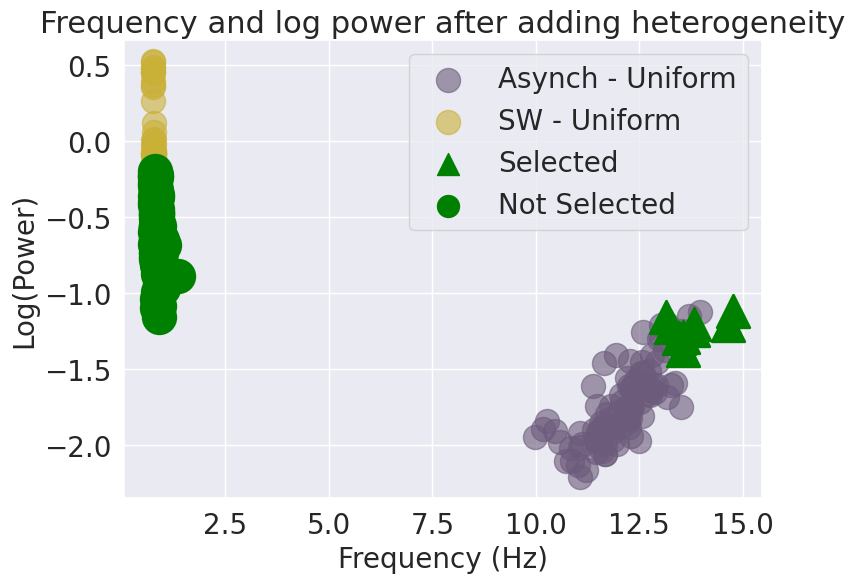

In [34]:
# Parameters
figname = 'FIG_6_B'

# Create the figure
fig, ax = plt.subplots(figsize=(8, 6))

# Load max frequencies and powers from homogeneous experiments
max_freqs_all_low_lr = np.squeeze(res_hom_100['full_results']['observables']['max_freqs_rates'])
max_powers_all_low_lr = np.squeeze(res_hom_100['full_results']['observables']['max_power_rates'])

max_freqs_all_high_lr = np.squeeze(res_hom_1500['full_results']['observables']['max_freqs_rates'])
max_powers_all_high_lr = np.squeeze(res_hom_1500['full_results']['observables']['max_power_rates'])

# Load heterogeneous experiments (only STR)
max_freqs_all_het = np.squeeze(res_hom_100_het_1500_connected['full_results']['observables']['max_freqs_rates'])
max_powers_all_het = np.squeeze(res_hom_100_het_1500_connected['full_results']['observables']['max_power_rates'])

# Scatter plots for high and low learning rates
ax.scatter(max_freqs_all_high_lr.mean(axis=0), np.log(max_powers_all_high_lr.mean(axis=0)), 
           label="Asynch - Uniform", alpha=0.6, s=300, color=category_colors['Asynch'])
ax.scatter(max_freqs_all_low_lr.mean(axis=0), np.log(max_powers_all_low_lr.mean(axis=0)), 
           label="SW - Uniform", alpha=0.6, s=300, color=category_colors['SW'])

# STR selected regions
str_selected = most_connected[:amount_of_regions[0]]

# Plot STR - Het (with filled markers for selected regions)
str_freqs_first = max_freqs_all_het[0].mean(axis=0)
str_powers_first = np.log(max_powers_all_het[0].mean(axis=0))
for i, (f, p) in enumerate(zip(str_freqs_first, str_powers_first)):
    marker = '^' if i in str_selected else 'o'
    ax.scatter(f, p, s=550, color='green', zorder=2, marker=marker,linewidths=2)
ax.scatter([], [], s=250, color='green', marker='^', label="Selected", zorder=2)
ax.scatter([], [], s=250, color='green', marker='o', label="Not Selected", zorder=2)

# Labels, title, and legend
ax.set_xlabel("Frequency (Hz)", fontsize=LABEL)
ax.set_ylabel("Log(Power)", fontsize=LABEL)
ax.set_title("Frequency and log power after adding heterogeneity", fontsize=TITLE)
ax.tick_params(axis='both', labelsize=TICKS)
ax.legend(fontsize=LEGEND)

# Layout and save
plt.tight_layout()
plt.savefig(figfold / (figname + '.png'), dpi=300)
plt.savefig(figfold / (figname + '.svg'), dpi=300)
plt.show()


Amount=9 regions (STR vs S-CORE): mean_diff=0.272, Cohen's d=1.114
  -> Meaningful effect size
Amount=9 regions (RANDOM vs S-CORE): mean_diff=0.265, Cohen's d=2.129
  -> Meaningful effect size
Amount=10 regions (STR vs S-CORE): mean_diff=0.314, Cohen's d=1.355
  -> Meaningful effect size
Amount=10 regions (RANDOM vs S-CORE): mean_diff=0.228, Cohen's d=2.930
  -> Meaningful effect size
Amount=66 regions (STR vs S-CORE): mean_diff=0.004, Cohen's d=0.067
Amount=66 regions (RANDOM vs S-CORE): mean_diff=0.017, Cohen's d=0.290
Amount=81 regions (STR vs S-CORE): mean_diff=0.002, Cohen's d=0.494
Amount=81 regions (RANDOM vs S-CORE): mean_diff=0.011, Cohen's d=1.594
  -> Meaningful effect size


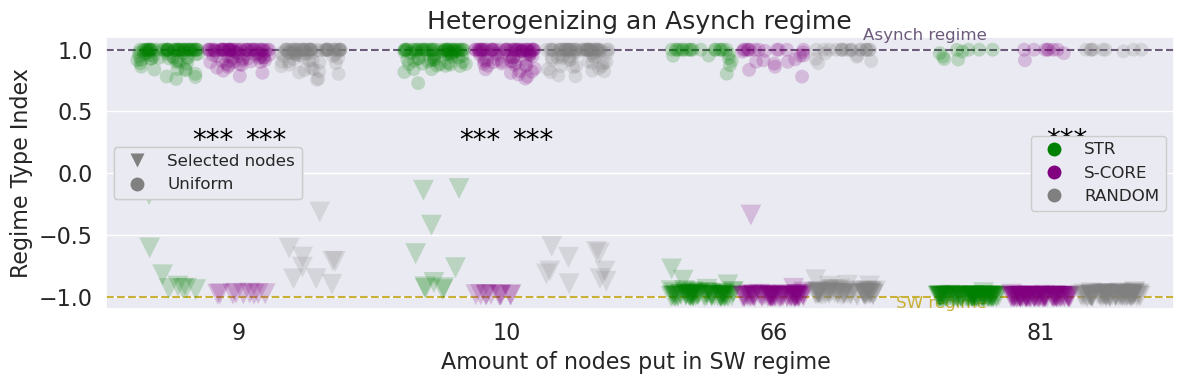

In [35]:
figname = 'FIG_6_C'
# Create the figure
fig, ax = plt.subplots(figsize=(12, 4))

# Add dashed lines
ax.axhline(y=1, color=col_pal_sw_asynch[1], linestyle='--')
ax.text(2.8, 1.08, 'Asynch regime', color=col_pal_sw_asynch[1], fontsize=12, ha='right')

ax.axhline(y=-1, color=col_pal_sw_asynch[0], linestyle='--')
ax.text(2.8, -1.09, 'SW regime', color=col_pal_sw_asynch[0], fontsize=12, ha='right')

# Strip plot for all those that were not selected
data_non = data[data['selected'] == False]  # Filter out selected regions



# Strip plot
sns.stripplot(data=data_non, x='amount_of_regions', 
              y='value', hue='group', jitter=0.35, dodge=True, ax=ax, marker='o',linewidth=0,edgecolor=None,
              palette=['green', 'purple','grey'], s=10, alpha=0.2)
# Stripplot on top of the same axes for selected regions
data_sel = data[data['selected'] == True]  # Filter out selected regions
# Strip plot for selected regions
sns.stripplot(data=data_sel, x='amount_of_regions', 
              y='value', hue='group', jitter=0.35, dodge=True, ax=ax, marker='v', linewidth=0,edgecolor=None,
              palette=['green', 'purple','grey'], s=15, alpha=0.2)
strip_handles, strip_labels = ax.get_legend_handles_labels()
for h in strip_handles:
    h.set_alpha(1.0)

# Add a 'v' marker to the strip handle without any color
# add a red 'v' marker for the "Selected regions" legend entry
selected_handle = Line2D([0], [0],
                         marker='v',
                         markerfacecolor='grey',     
                         markeredgecolor='None',                    
                         linestyle='None',
                         markersize=10)

non_selected_handle = Line2D([0], [0],
                         marker='o',
                         markerfacecolor='grey',                         
                            markeredgecolor='None',
                         linestyle='None',
                         markersize=10)

selected_handles = [selected_handle, non_selected_handle]
selected_labels = ["Selected nodes", "Uniform"]



# Statistical tests: compare STR and S-CORE per amount_of_regions using effect size.
unique_amounts = sorted(data['amount_of_regions'].unique())

for idx_amt,amt in enumerate(unique_amounts):
    subset = data[data['amount_of_regions'] == amt]
    values_str = subset[subset['group'] == 'STR']
    values_score = subset[subset['group'] == 'S-CORE']
    values_random = subset[subset['group'] == 'RANDOM']
    values_str = values_str[values_str['selected']]['value']
    values_score = values_score[values_score['selected']]['value']
    values_random = values_random[values_random['selected']]['value']
    
    # STR vs S-CORE: Cohen's d effect size
    mean_diff_str_score = values_str.mean() - values_score.mean()
    pooled_std = np.sqrt((values_str.std()**2 + values_score.std()**2) / 2)
    cohens_d_str_score = mean_diff_str_score / pooled_std if pooled_std > 0 else 0
    
    print(f"Amount={amt} regions (STR vs S-CORE): mean_diff={mean_diff_str_score:.3f}, Cohen's d={cohens_d_str_score:.3f}")
    
    # Annotate if effect size is medium or large (|d| >= 0.5) and absolute difference > 0.1
    if abs(cohens_d_str_score) >= 0.5:
        print(f"  -> Meaningful effect size")
        y_max = subset['value'].max()
        # Annotate based on effect size magnitude
        if abs(cohens_d_str_score) >= 0.8:
            marker = '***'  # Large effect
        elif abs(cohens_d_str_score) >= 0.5:
            marker = '**'   # Medium effect
        ax.text(idx_amt-0.1, 0.15, marker, ha='center', va='bottom', color='black', fontsize=20)
    
    # RANDOM vs S-CORE: Cohen's d effect size
    mean_diff_random_score = values_random.mean() - values_score.mean()
    pooled_std = np.sqrt((values_random.std()**2 + values_score.std()**2) / 2)
    cohens_d_random_score = mean_diff_random_score / pooled_std if pooled_std > 0 else 0
    
    print(f"Amount={amt} regions (RANDOM vs S-CORE): mean_diff={mean_diff_random_score:.3f}, Cohen's d={cohens_d_random_score:.3f}")
    
    # Annotate if effect size is medium or large (|d| >= 0.5) and absolute difference > 0.1
    if abs(cohens_d_random_score) >= 0.5:
        print(f"  -> Meaningful effect size")
        y_max = subset['value'].max()
        if abs(cohens_d_random_score) >= 0.8:
            marker = '***'  # Large effect
        elif abs(cohens_d_random_score) >= 0.5:
            marker = '**'   # Medium effect
        ax.text(idx_amt+0.1, 0.15, marker, ha='center', va='bottom', color='black', fontsize=20)

# Labels, title, and legend
ax.set_xlabel("Amount of nodes put in SW regime ", fontsize=LABEL-4)
ax.set_ylabel("Regime Type Index", fontsize=LABEL-4)
ax.set_title("Heterogenizing an Asynch regime", fontsize=TITLE-4)
ax.tick_params(axis='both', labelsize=TICKS-4)
ax.set_yticks([1, 0.5, 0, -0.5, -1])

# First legend: Groups (STR, S-CORE, Random)
first_legend = ax.legend(
    strip_handles,
    strip_labels[:3],  # Only take first 3 labels (STR, S-CORE, Random)
    fontsize=12,
    title_fontsize=14,
    loc='center right',
    framealpha=1
)

# Add second legend for marker types (selected vs non-selected)
second_legend = ax.legend(
    selected_handles,
    selected_labels,
    fontsize=12,
    title_fontsize=14,
    loc='center left',
    framealpha=1
)

# Add first legend back to the plot (since adding second legend removes it)
ax.add_artist(first_legend)
ax.add_artist(second_legend)
# Layout and save
plt.tight_layout()
fig.savefig(figfold / (figname + '.svg'), dpi=300)
fig.savefig(figfold / (figname + '.png'), dpi=300)
plt.show()


Amount=9 regions (STR vs S-CORE): mean_diff=0.004, Cohen's d=0.139
Amount=9 regions (RANDOM vs S-CORE): mean_diff=0.007, Cohen's d=0.294
Amount=10 regions (STR vs S-CORE): mean_diff=-0.007, Cohen's d=-0.196
Amount=10 regions (RANDOM vs S-CORE): mean_diff=-0.008, Cohen's d=-0.205
Amount=66 regions (STR vs S-CORE): mean_diff=0.000, Cohen's d=0.004
Amount=66 regions (RANDOM vs S-CORE): mean_diff=-0.003, Cohen's d=-0.054
Amount=81 regions (STR vs S-CORE): mean_diff=-0.018, Cohen's d=-0.302
Amount=81 regions (RANDOM vs S-CORE): mean_diff=-0.006, Cohen's d=-0.129


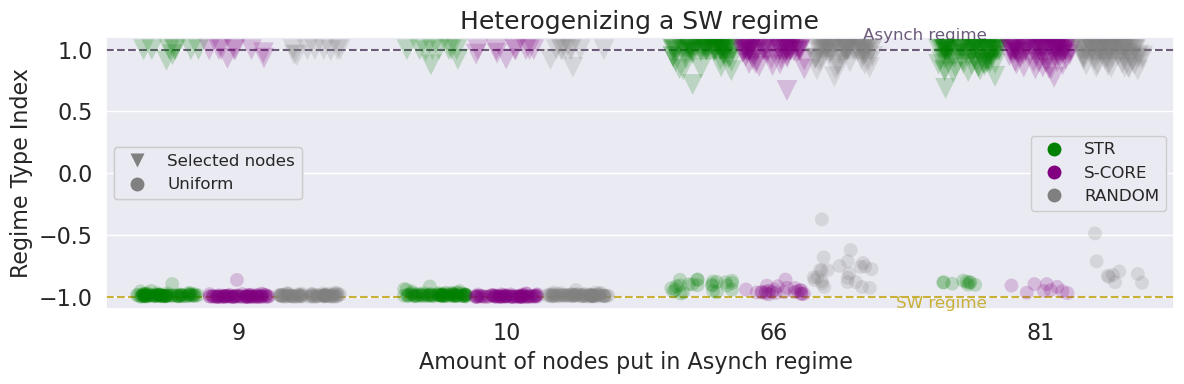

In [36]:
quimeric_delta = quimeric_delta_connected_1500
quimeric_delta_score = quimeric_delta_score_1500
quimeric_delta_random = quimeric_delta_random_1500
N = C.shape[0]

# Parameters
figname = 'FIG_6_D'
# 1) Build the actual selections for each amount
str_selections   = [most_connected[:N]        for N in amount_of_regions]
score_selections = [score_idxs[idx]           for idx in cherry_pick_scores_idx]
random_selections = [s['selection']  for s in hom_100_het_1500_random_selection]
# 2) Turn them into Boolean masks of shape (n_amounts, n_regions)
str_mask   = np.array([[r in sel for r in range(N)] for sel in str_selections])
score_mask = np.array([[r in sel for r in range(N)] for sel in score_selections])
random_mask = np.array([[r in sel for r in range(N)] for sel in random_selections])
# 3) Flatten everything into one long vector
values        = np.concatenate([quimeric_delta.ravel(),        quimeric_delta_score.ravel(), quimeric_delta_random.ravel()])
groups        = ['STR']   * quimeric_delta.size + ['S-CORE'] * quimeric_delta_score.size + ['RANDOM'] * quimeric_delta_random.size
amounts       = np.concatenate([
                    np.repeat(amount_of_regions, N),
                    np.repeat(amount_of_regions, N),
                    np.repeat(amount_of_regions, N)
               ])
selected_flag = np.concatenate([str_mask.ravel(), score_mask.ravel(), random_mask.ravel()])


# 4) Build the DataFrame
data = pd.DataFrame({
    'value'             : values,
    'group'             : groups,
    'amount_of_regions' : amounts,
    'selected'          : selected_flag
})
data['value'] = np.clip(data['value'], -1, 1)
# Create the figure
fig, ax = plt.subplots(figsize=(12, 4))

# Add dashed lines
ax.axhline(y=1, color=col_pal_sw_asynch[1], linestyle='--')
ax.text(2.8, 1.08, 'Asynch regime', color=col_pal_sw_asynch[1], fontsize=12, ha='right')

ax.axhline(y=-1, color=col_pal_sw_asynch[0], linestyle='--')
ax.text(2.8, -1.09, 'SW regime', color=col_pal_sw_asynch[0], fontsize=12, ha='right')

# Strip plot for all those that were not selected

data_non = data[data['selected'] == False]  # Filter out selected regions
# Strip plot
sns.stripplot(data=data_non, x='amount_of_regions', 
              y='value', hue='group', jitter=0.35, dodge=True, ax=ax, marker='o',linewidth=0,edgecolor=None,
              palette=['green', 'purple', 'grey'], s=10, alpha=0.2)
# Stripplot on top of the same axes for selected regions
data_sel = data[data['selected'] == True]  # Filter out selected regions
# Strip plot for selected regions
sns.stripplot(data=data_sel, x='amount_of_regions', 
              y='value', hue='group', jitter=0.35, dodge=True, ax=ax, marker='v', linewidth=0,edgecolor=None,
              palette=['green', 'purple', 'grey'], s=15, alpha=0.2)
strip_handles, strip_labels = ax.get_legend_handles_labels()
for h in strip_handles:
    h.set_alpha(1.0)

# Add a 'v' marker to the strip handle without any color
# add a red 'v' marker for the "Selected regions" legend entry
selected_handle = Line2D([0], [0],
                         marker='v',
                         markerfacecolor='grey',     
                         markeredgecolor='None',                    
                         linestyle='None',
                         markersize=10)

non_selected_handle = Line2D([0], [0],
                         marker='o',
                         markerfacecolor='grey',                         
                            markeredgecolor='None',
                         linestyle='None',
                         markersize=10)

selected_handles = [selected_handle, non_selected_handle]
selected_labels = ["Selected nodes", "Uniform"]


# Violin plot
# Clip the data from 1 to -1
#sns.violinplot(data=data, x='amount_of_regions', y='value', hue='group', ax=ax, 
#               palette=['green', 'purple'], split=True, inner='quartile', bw_method=0.1,cut=0, alpha=0.6)

# Statistical tests: compare STR and S-CORE per amount_of_regions using effect size.
unique_amounts = sorted(data['amount_of_regions'].unique())

for idx_amt,amt in enumerate(unique_amounts):
    subset = data[data['amount_of_regions'] == amt]
    values_str = subset[subset['group'] == 'STR']
    values_score = subset[subset['group'] == 'S-CORE']
    values_random = subset[subset['group'] == 'RANDOM']
    values_str = values_str[values_str['selected']]['value']
    values_score = values_score[values_score['selected']]['value']
    values_random = values_random[values_random['selected']]['value']
    
    # STR vs S-CORE: Cohen's d effect size
    mean_diff_str_score = values_str.mean() - values_score.mean()
    pooled_std = np.sqrt((values_str.std()**2 + values_score.std()**2) / 2)
    cohens_d_str_score = mean_diff_str_score / pooled_std if pooled_std > 0 else 0
    
    print(f"Amount={amt} regions (STR vs S-CORE): mean_diff={mean_diff_str_score:.3f}, Cohen's d={cohens_d_str_score:.3f}")
    
    # Annotate if effect size is medium or large (|d| >= 0.5) and absolute difference > 0.1
    if abs(cohens_d_str_score) >= 0.5 and abs(mean_diff_str_score) > 0.1:
        print(f"  -> Meaningful effect size")
        y_max = subset['value'].max()
        # Annotate based on effect size magnitude
        if abs(cohens_d_str_score) >= 0.8:
            marker = '***'  # Large effect
        elif abs(cohens_d_str_score) >= 0.5:
            marker = '**'   # Medium effect
        ax.text(idx_amt-0.1, 0.15, marker, ha='center', va='bottom', color='black', fontsize=20)
    
    # RANDOM vs S-CORE: Cohen's d effect size
    mean_diff_random_score = values_random.mean() - values_score.mean()
    pooled_std = np.sqrt((values_random.std()**2 + values_score.std()**2) / 2)
    cohens_d_random_score = mean_diff_random_score / pooled_std if pooled_std > 0 else 0
    
    print(f"Amount={amt} regions (RANDOM vs S-CORE): mean_diff={mean_diff_random_score:.3f}, Cohen's d={cohens_d_random_score:.3f}")
    
    # Annotate if effect size is medium or large (|d| >= 0.5) and absolute difference > 0.1
    if abs(cohens_d_random_score) >= 0.5:
        print(f"  -> Meaningful effect size")
        y_max = subset['value'].max()
        if abs(cohens_d_random_score) >= 0.8:
            marker = '***'  # Large effect
        elif abs(cohens_d_random_score) >= 0.5:
            marker = '**'   # Medium effect
        ax.text(idx_amt+0.1, 0.15, marker, ha='center', va='bottom', color='black', fontsize=20)

# Labels, title, and legend
ax.set_xlabel("Amount of nodes put in Asynch regime ", fontsize=LABEL-4)
ax.set_ylabel("Regime Type Index", fontsize=LABEL-4)
ax.set_title("Heterogenizing a SW regime", fontsize=TITLE-4)
ax.tick_params(axis='both', labelsize=TICKS-4)
ax.set_yticks([1, 0.5, 0, -0.5, -1])

# First legend: Groups (STR, S-CORE, Random)
first_legend = ax.legend(
    strip_handles,
    strip_labels[:3],  # Only take first 3 labels (STR, S-CORE, Random)
    fontsize=12,
    title_fontsize=14,
    loc='center right',
    framealpha=1
)

# Add second legend for marker types (selected vs non-selected)
second_legend = ax.legend(
    selected_handles,
    selected_labels,
    fontsize=12,
    title_fontsize=14,
    loc='center left',
    framealpha=1
)

# Add first legend back to the plot (since adding second legend removes it)
ax.add_artist(first_legend)
ax.add_artist(second_legend)
# Layout and save
plt.tight_layout()
fig.savefig(figfold / (figname + '.svg'), dpi=300)
fig.savefig(figfold / (figname + '.png'), dpi=300)
plt.show()


# Fig 6

## Overlap with SW

In [37]:
import pickle

exp = ExperimentManager(project_root=project_root, experiment_id="Fitting_Grid", results_dir="/network/iss/cohen/data/Ivan/fastHDMF/")
save_path = exp.experiment_dir / 'Observables_Grid'

with open(save_path / 'Overlap_Results.pkl', 'rb') as f:
    hdmf_overlap_results = pickle.load(f)

exp = ExperimentManager(project_root=project_root, experiment_id="Fitting_Grid_Static", results_dir="/network/iss/cohen/data/Ivan/fastHDMF/")
save_path = exp.experiment_dir / 'Observables_Grid'

with open(save_path / 'Overlap_Results.pkl', 'rb') as f:
    dmf_overlap_results = pickle.load(f)

2025-12-19 16:34:08,232 - hdmf_experiment_Fitting_Grid - INFO - Experiment 'Fitting_Grid' initialized
2025-12-19 16:34:08,234 - hdmf_experiment_Fitting_Grid - INFO - Config: FC and FCD grid 
2025-12-19 16:34:08,236 - hdmf_experiment_Fitting_Grid - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/Fitting_Grid
2025-12-19 16:34:08,247 - hdmf_experiment_Fitting_Grid - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0


2025-12-19 16:34:08,377 - hdmf_experiment_Fitting_Grid_Static - INFO - Experiment 'Fitting_Grid_Static' initialized
2025-12-19 16:34:08,379 - hdmf_experiment_Fitting_Grid_Static - INFO - Config: FC and FCD grid for Static DMF
2025-12-19 16:34:08,380 - hdmf_experiment_Fitting_Grid_Static - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/Fitting_Grid_Static
2025-12-19 16:34:08,397 - hdmf_experiment_Fitting_Grid_Static - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0


INFO: Searching for config file: Fitting_Grid.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Fitting_Grid
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Fitting_Grid.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Fitting_Grid.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices
INFO: Searching for config file: Fitting_Grid_Static.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: Fitting_Grid_Static
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Fitting_Grid_Static.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/Fitting_Grid_Static.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


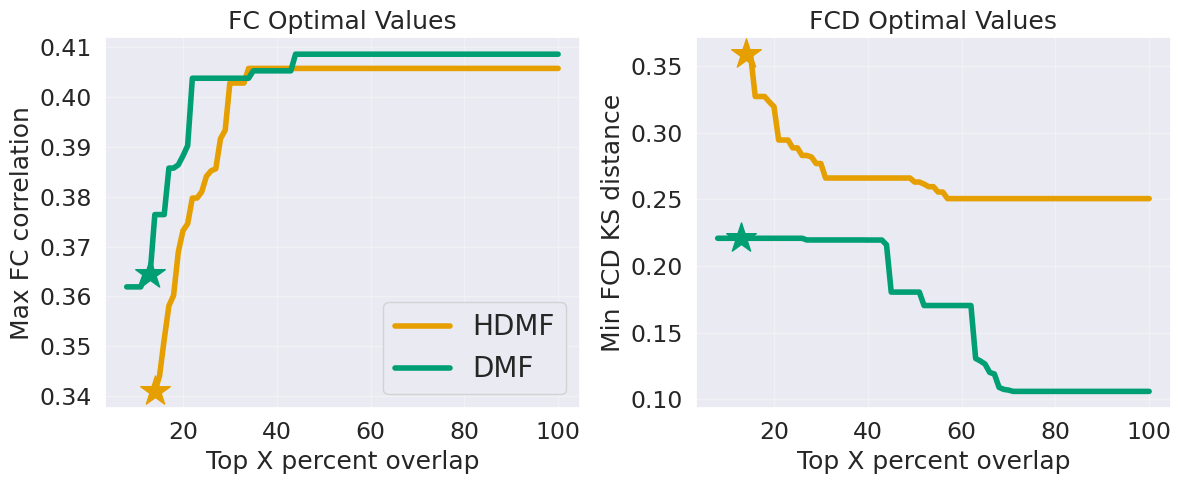

Comparison complete: FC and FCD optimal values plotted as a function of top-x-percent


In [38]:
import matplotlib.lines as mlines
figname = "FIG_3_A"
sns.set_style("darkgrid")
# Compare FC and FCD optimals between HDMF and DMF as a function of threshold
hdmf_patch = mlines.Line2D([],[],color='k', label='HDMF', marker='o',markersize=10)
dmf_patch = mlines.Line2D([],[],color='k', label='DMF', marker='^',markersize=10)
fig = plt.figure(figsize=(12, 5))

# Extract data for both methods
thresholds_hdmf = sorted(hdmf_overlap_results.keys())
fc_optimals_hdmf = [hdmf_overlap_results[t]['max_fc_in_overlap'] for t in thresholds_hdmf]
fcd_optimals_hdmf = [hdmf_overlap_results[t]['min_fcd_in_overlap'] for t in thresholds_hdmf]

thresholds_dmf = sorted(dmf_overlap_results.keys())
fc_optimals_dmf = [dmf_overlap_results[t]['max_fc_in_overlap'] for t in thresholds_dmf]
fcd_optimals_dmf = [dmf_overlap_results[t]['min_fcd_in_overlap'] for t in thresholds_dmf]

# Plot FC optimals
plt.subplot(1, 2, 1)
plt.plot(thresholds_hdmf, fc_optimals_hdmf, color=category_colors['Dynamic'], label='HDMF', linewidth=4, markersize=8)
plt.plot(thresholds_dmf, fc_optimals_dmf, color=category_colors['Static'], label='DMF', linewidth=4, markersize=8)
# Add star marker at 14% for HDMF
plt.scatter([14], [hdmf_overlap_results[14]['max_fc_in_overlap']], marker='*', s=500, color=category_colors['Dynamic'], zorder=5)
# Add star marker at 13% for DMF
plt.scatter([13], [dmf_overlap_results[13]['max_fc_in_overlap']], marker='*', s=500, color=category_colors['Static'], zorder=5)
plt.xlabel('Top X percent overlap', fontsize=LABEL-2)
plt.ylabel('Max FC correlation', fontsize=LABEL-2)
plt.title('FC Optimal Values', fontsize=TITLE-4)
# Set tick sizes
plt.xticks(fontsize=LABEL-3)
plt.yticks(fontsize=LABEL-3)
plt.legend(fontsize=LEGEND)
plt.grid(True, alpha=0.3)

# Plot FCD optimals
plt.subplot(1, 2, 2)
plt.plot(thresholds_hdmf, fcd_optimals_hdmf, color=category_colors['Dynamic'], label='HDMF', linewidth=4, markersize=8)
plt.plot(thresholds_dmf, fcd_optimals_dmf, color=category_colors['Static'], label='DMF', linewidth=4, markersize=8)
# Add star marker at 14% for HDMF
plt.scatter([14], [hdmf_overlap_results[14]['min_fcd_in_overlap']], marker='*', s=500, color=category_colors['Dynamic'], zorder=5)
# Add star marker at 13% for DMF
plt.scatter([13], [dmf_overlap_results[13]['min_fcd_in_overlap']], marker='*', s=500, color=category_colors['Static'], zorder=5)
plt.xlabel('Top X percent overlap', fontsize=LABEL-2)
plt.ylabel('Min FCD KS distance', fontsize=LABEL-2)
plt.title('FCD Optimal Values', fontsize=TITLE-4)
# Set tick sizes
plt.xticks(fontsize=LABEL-3)
plt.yticks(fontsize=LABEL-3)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
# Save figure like before
#fig.savefig(figfold / (figname + '.svg'), dpi=300)
#fig.savefig(figfold / (figname + '.png'), dpi=300)
print("Comparison complete: FC and FCD optimal values plotted as a function of top-x-percent")


In [39]:
experiment_manager = ExperimentManager(project_root, experiment_id="SW_Grid", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res = experiment_manager.load_experiment_results()

2025-12-19 16:34:11,607 - hdmf_experiment_SW_Grid - INFO - Experiment 'SW_Grid' initialized
2025-12-19 16:34:11,608 - hdmf_experiment_SW_Grid - INFO - Config: Slow wave grid search test
2025-12-19 16:34:11,610 - hdmf_experiment_SW_Grid - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/SW_Grid
2025-12-19 16:34:11,621 - hdmf_experiment_SW_Grid - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:34:11,624 - hdmf_experiment_SW_Grid - INFO - Searching for config file: SW_Grid.yaml
2025-12-19 16:34:11,625 - hdmf_experiment_SW_Grid - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:34:11,635 - hdmf_experiment_SW_Grid - INFO - SW_Grid
2025-12-19 16:34:11,636 - hdmf_experiment_SW_Grid - INFO - Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/SW_Grid.yaml')]


2025-12-19 16:34:11,649 - hdmf_experiment_SW_Grid - INFO - Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/SW_Grid.yaml


INFO: Searching for config file: SW_Grid.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: SW_Grid
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/SW_Grid.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/SW_Grid.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


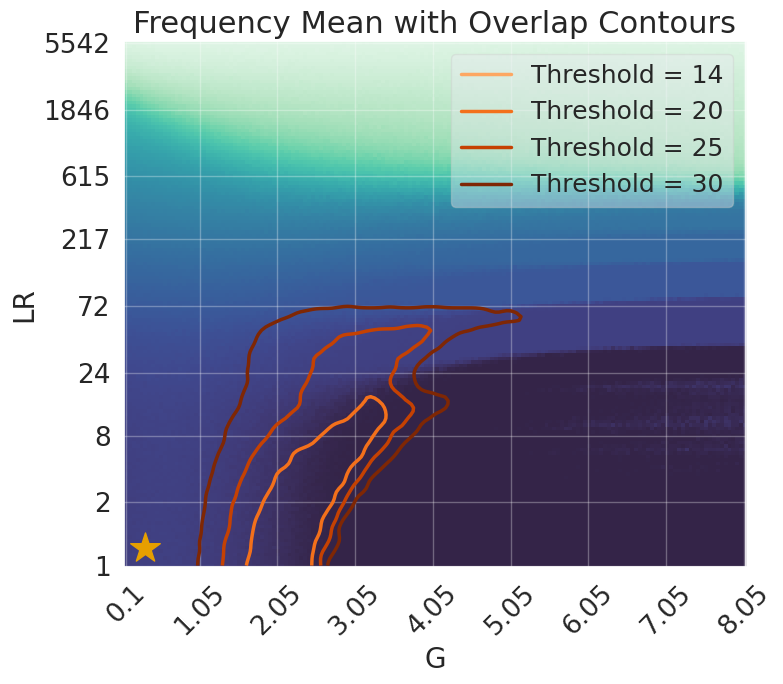

In [40]:
from matplotlib.lines import Line2D
from scipy.ndimage import gaussian_filter

threshold_hdmf_list = [14, 20, 25, 30]

figname_base = 'FIG_3_INSET'



# Extract data from SW_Grid results
G_range = res['full_results']['axis_values']['G']
LR_range = res['full_results']['axis_values']['lrj']
freq_mean = np.mean(res['full_results']['observables']['max_freqs_rates'], axis=(2, 3))

# Define tick indices and labels
lr_tick_indices = np.linspace(0, len(LR_range) - 1, 9, dtype=int)
lr_tick_labels = np.round(LR_range[lr_tick_indices], 2)
G_tick_indices = np.linspace(0, len(G_range) - 1, 9, dtype=int)
G_tick_labels = np.round(G_range[G_tick_indices], 2)

# Create figure with single plot
fig, ax = plt.subplots(figsize=(8, 7))

LR_limit = 150
G_range = res['full_results']['axis_values']['G']
LR_range = res['full_results']['axis_values']['lrj'][:LR_limit]
freq_mean = np.mean(res['full_results']['observables']['max_freqs_rates'][:LR_limit, :, :, :], axis=(2, 3))
# Define tick indices and labels
lr_tick_indices = np.linspace(0, len(LR_range) - 1, 9, dtype=int)
lr_tick_labels = np.round(LR_range[lr_tick_indices], 2)
G_tick_indices = np.linspace(0, len(G_range) - 1, 9, dtype=int)
G_tick_labels = np.round(G_range[G_tick_indices], 2)

# Background heatmap
im = ax.imshow(freq_mean, aspect='auto', cmap='mako',
               norm=LogNorm(vmin=0.1, vmax=freq_mean.max()),
               origin='upper')
# 

ax.set_xticks(G_tick_indices)
ax.set_xticklabels(G_tick_labels, fontsize=TICKS-1,rotation=45)
ax.set_yticks(lr_tick_indices)
ax.set_yticklabels([int(label) for label in lr_tick_labels], fontsize=TICKS-1)
ax.set_xlabel('G', fontsize=LABEL)
ax.set_ylabel('LR', fontsize=LABEL)
ax.invert_yaxis()

# Get 4 gradients of oranges for contours
colors = plt.get_cmap('Oranges')(np.linspace(0.4, 1.0, len(threshold_hdmf_list)))

# Add contours for each threshold
for idx, threshold in enumerate(threshold_hdmf_list):
    threshold = min(threshold, len(hdmf_overlap_results) - 1)
    overlap_at_threshold = hdmf_overlap_results[threshold]['overlap_mask'][:LR_limit, :]
    #overlap_at_threshold = overlap_at_threshold[::-1, :]  # Flip vertically for correct orientation
      
    # Smooth the data using Gaussian filter for cleaner contours
    overlap_smooth = gaussian_filter(overlap_at_threshold.astype(float), sigma=1.5)
    
    # Use plt.contour with proper extent to match the axes
    ax.contour(overlap_smooth, levels=[0.5], colors=[colors[idx]], linewidths=2.5)


plt.scatter(5, 5, marker='*', s=500, color=category_colors['Dynamic'], zorder=5)



ax.set_title('Frequency Mean with Overlap Contours', fontsize=TITLE)
ax.grid(True, alpha=0.3)

legend_elements = [Line2D([0], [0], color=colors[idx], lw=2.5, 
                          label=f'Threshold = {threshold_hdmf_list[idx]}')
                   for idx in range(len(threshold_hdmf_list))]
ax.legend(handles=legend_elements, fontsize=LABEL-2, loc='upper right', framealpha=0.4)

plt.tight_layout()
plt.show()
# Save figure like before
#fig.savefig(figfold / (figname_base + '.svg'), dpi=300)
#fig.savefig(figfold / (figname_base + '.png'), dpi=300)


In [41]:
from fastHDMF.helper_functions import filter_bold, compute_fcd
from scipy.io import loadmat

def compute_fcd(data, wsize, overlap, isubdiag):
    T, N = data.shape
    win_start = np.arange(0, T - wsize - 1, wsize - overlap)
    nwins = len(win_start)
    fcd = np.zeros((len(isubdiag[0]), nwins))
    #print(fcd.shape)
    #print(data.shape)
    #print((data[win_start[2]:win_start[2] + wsize + 1, :]).shape)
    for i in range(nwins):
        tmp = data[win_start[i]:win_start[i] + wsize + 1, :]
        cormat = np.corrcoef(tmp.T)
        fcd[:, i] = cormat[isubdiag[0],isubdiag[1]]
    return fcd


exp = ExperimentManager(project_root=project_root, experiment_id="DMF_Top13%_Overlap", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res = exp.load_experiment_results()

DMF_FCD_repeats = np.squeeze(res['full_results']['observables']['fcd_bold'])[np.load(exp.experiment_dir / "DMF_FCD_Best_Point_Index.npy").item()]
element_shape = DMF_FCD_repeats.flatten()[0].shape
nrep = DMF_FCD_repeats.shape[0]
static_fcd_grid = np.stack(DMF_FCD_repeats.flatten()).reshape((nrep, *element_shape))

DMF_FC_repeats = np.squeeze(res['full_results']['observables']['fc_bold'])[np.load(exp.experiment_dir / "DMF_FC_Best_Point_Index.npy").item()]
element_shape = DMF_FC_repeats.flatten()[0].shape
nrep = DMF_FC_repeats.shape[0]
static_fc_grid = np.stack(DMF_FC_repeats.flatten()).reshape((nrep, *element_shape))

exp = ExperimentManager(project_root=project_root, experiment_id="DMF_Top13%_Overlap_Entropy", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res = exp.load_experiment_results()
stat_entropy = res['full_results']['observables']['gamma_entropy_rates']
element_shape = stat_entropy.flatten()[0].shape
ent_stat = np.stack(stat_entropy.flatten()).reshape((nrep, *element_shape)).mean(axis=1)

exp = ExperimentManager(project_root=project_root, experiment_id="HDMF_Top14%_Overlap", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res = exp.load_experiment_results()
HDMF_FCD_repeats = np.squeeze(res['full_results']['observables']['fcd_bold'][np.load(exp.experiment_dir / "HDMF_FCD_Best_Point_Index.npy").item()])
HDMF_FCD_repeats_results = np.zeros(HDMF_FCD_repeats.shape[0])
element_shape = HDMF_FCD_repeats.flatten()[0].shape
n_rep = HDMF_FCD_repeats.shape[0]
dynamic_fcd_grid = np.stack(HDMF_FCD_repeats.flatten()).reshape((nrep, *element_shape))

fcds_grid = np.stack((static_fcd_grid, dynamic_fcd_grid), axis=0)

HDMF_FC_repeats = np.squeeze(res['full_results']['observables']['fc_bold'])[np.load(exp.experiment_dir / "HDMF_FC_Best_Point_Index.npy").item()]
HDMF_FC_repeats_results = np.zeros(HDMF_FC_repeats.shape[0])
element_shape = HDMF_FC_repeats.flatten()[0].shape
n_rep = HDMF_FC_repeats.shape[0]
dynamic_fc_grid = np.stack(HDMF_FC_repeats.flatten()).reshape((nrep, *element_shape))

fcs_grid = np.stack((static_fc_grid, dynamic_fc_grid), axis=0)

exp = ExperimentManager(project_root=project_root, experiment_id="HDMF_Top14%_Overlap_Entropy", results_dir="/network/iss/cohen/data/Ivan/fastHDMF")
res = exp.load_experiment_results()
dynamic_entropy = res['full_results']['observables']['gamma_entropy_rates']
element_shape = dynamic_entropy.flatten()[0].shape
ent_dyn = np.stack(dynamic_entropy.flatten()).reshape((nrep, *element_shape)).mean(axis=1)


runner = HDMFSimulationRunner(experiment_manager=exp)

task = runner.tasks[0]
task['sc_matrix'] = runner.items[0][1]['sc_matrix']
params = runner.prepare_hdmf_params(task)

emp_data = loadmat('../data/ts_coma24_AAL_symm_withSC.mat')
emp_data = np.squeeze(np.array(emp_data['timeseries_CNT24_symm']))
emp_data = np.stack(emp_data.flatten())[:,:,exp.current_config['simulation']['burnout']:]
for sub in range(emp_data.shape[0]):    
    emp_data[sub] = filter_bold(emp_data[sub], flp=params['flp'],fhp=params['fhp'],tr=params['TR'])
isubfcd = np.triu_indices(params['N'], 1)
params["wsize"] = 30
params["overlap"] = 29

emp_fcds = []
for sub in range(emp_data.shape[0]):
    fcds = compute_fcd(emp_data[sub, :, :].T, params["wsize"], params['overlap'], isubfcd)
    upp_tr_fcd = np.corrcoef(fcds.T)[isubfcd]
    emp_fcds.append(upp_tr_fcd)

emp_fc = np.mean(np.array([np.corrcoef(emp_data[sub, :, :]) for sub in range(emp_data.shape[0])]), axis=0)

# remove the diagonal

emp_fc = emp_fc - np.eye(emp_fc.shape[0])

emp_fcd = np.hstack((emp_fcds))

2025-12-19 16:34:17,430 - hdmf_experiment_DMF_Top13%_Overlap - INFO - Experiment 'DMF_Top13%_Overlap' initialized
2025-12-19 16:34:17,432 - hdmf_experiment_DMF_Top13%_Overlap - INFO - Config: Running 20 parameter combinations from DMF top 15% overlap
2025-12-19 16:34:17,433 - hdmf_experiment_DMF_Top13%_Overlap - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/DMF_Top13%_Overlap
2025-12-19 16:34:17,444 - hdmf_experiment_DMF_Top13%_Overlap - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:34:17,446 - hdmf_experiment_DMF_Top13%_Overlap - INFO - Searching for config file: DMF_Top13%_Overlap.yaml
2025-12-19 16:34:17,447 - hdmf_experiment_DMF_Top13%_Overlap - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:34:17,455 - hdmf_experiment_DMF_Top13%_Overlap - INFO - DMF_Top13%_Overlap
2025-12-19 16:34:17,457 - hdmf_experiment_DMF_Top13%_Overlap - INFO - Found config matches: [

INFO: Searching for config file: DMF_Top13%_Overlap.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: DMF_Top13%_Overlap
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/DMF_Top13%_Overlap.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/DMF_Top13%_Overlap.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


2025-12-19 16:34:18,024 - hdmf_experiment_DMF_Top13%_Overlap_Entropy - INFO - Experiment 'DMF_Top13%_Overlap_Entropy' initialized
2025-12-19 16:34:18,025 - hdmf_experiment_DMF_Top13%_Overlap_Entropy - INFO - Config: 100 repetitions where Static DMF is in the top 13% overlap between FC and FCD, calculate entropy 
2025-12-19 16:34:18,026 - hdmf_experiment_DMF_Top13%_Overlap_Entropy - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/DMF_Top13%_Overlap_Entropy
2025-12-19 16:34:18,040 - hdmf_experiment_DMF_Top13%_Overlap_Entropy - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:34:18,044 - hdmf_experiment_DMF_Top13%_Overlap_Entropy - INFO - Searching for config file: DMF_Top13%_Overlap_Entropy.yaml
2025-12-19 16:34:18,045 - hdmf_experiment_DMF_Top13%_Overlap_Entropy - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:34:18,055 - hdmf_experiment_DMF_Top13%_Ove

INFO: Searching for config file: DMF_Top13%_Overlap_Entropy.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: DMF_Top13%_Overlap_Entropy
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/DMF_Top13%_Overlap_Entropy.yaml'), PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/grid_runs/DMF_Top13%_Overlap_Entropy.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/DMF_Top13%_Overlap_Entropy.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices
INFO: Searching for config file: HDMF_Top14%_Overlap.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: HDMF_Top14%_Overlap
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/HDMF_Top14%_Overlap.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mind

2025-12-19 16:34:18,679 - hdmf_experiment_HDMF_Top14%_Overlap_Entropy - INFO - Experiment 'HDMF_Top14%_Overlap_Entropy' initialized
2025-12-19 16:34:18,680 - hdmf_experiment_HDMF_Top14%_Overlap_Entropy - INFO - Config: 100 repetitions where Dynamic HDMF is in the top 14% overlap between FC and FCD, calculate entropy 
2025-12-19 16:34:18,681 - hdmf_experiment_HDMF_Top14%_Overlap_Entropy - INFO - Results will be saved to: /network/iss/cohen/data/Ivan/fastHDMF/AAL_HDMF_PAPER/HDMF_Top14%_Overlap_Entropy
2025-12-19 16:34:18,693 - hdmf_experiment_HDMF_Top14%_Overlap_Entropy - INFO - Loaded SC matrices for 1 patients from Averaged_SCs/aal with config threshold 0
2025-12-19 16:34:18,696 - hdmf_experiment_HDMF_Top14%_Overlap_Entropy - INFO - Searching for config file: HDMF_Top14%_Overlap_Entropy.yaml
2025-12-19 16:34:18,697 - hdmf_experiment_HDMF_Top14%_Overlap_Entropy - INFO - Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
2025-12-19 16:34:18,705 - hdmf_experiment_HDM

INFO: Searching for config file: HDMF_Top14%_Overlap_Entropy.yaml
INFO: Configs directory: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs
INFO: HDMF_Top14%_Overlap_Entropy
INFO: Found config matches: [PosixPath('/network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/HDMF_Top14%_Overlap_Entropy.yaml')]
INFO: Loaded config from: /network/iss/home/ivan.mindlin/Repos/fastHDMF/configs/experiments/HDMF_Top14%_Overlap_Entropy.yaml
Creating IPP list from SC matrices in: Averaged_SCs/aal
Found 1 IPPs from SC matrices


In [42]:


triu_fc  = np.triu_indices(fcs_grid.shape[2], k=1)
n_rep    = fcs_grid.shape[1]

rep_corr = np.zeros((2, n_rep))
mean_mse_values = np.zeros((2, n_rep))  # MSE values for each repetition
mean_ssim_values = np.zeros((2, n_rep))  # SSIM values for each repetition
rep_ks   = np.zeros((2, n_rep))
rep_entropy = np.zeros((2, n_rep))

sim_fcd_stat_vals = []        # 1‑D vectors collected here
sim_fcd_dyn_vals  = []

for m, label in enumerate(("Static", "Dynamic")):          # m = 0/1
    # sample-based FC/FCD comparison: 100 draws of 15 reps each
    n_iter = 100
    sample_size = 15
    triu_FCD = np.triu_indices(fcds_grid.shape[2], k=1)

    for i in range(n_iter):
        # pick 15 distinct repetitions
        idx = np.random.choice(n_rep, sample_size, replace=False)

        # --- FC: average across selected reps ---
        sim_fc_avg = fcs_grid[m, idx].mean(axis=0)
        rep_corr[m, i] = pearsonr(sim_fc_avg[triu_fc], emp_fc[triu_fc])[0]
        mean_mse_values[m, i] = np.mean((sim_fc_avg[triu_fc] - emp_fc[triu_fc])**2)
        # Calculate also the SSIM between empirical and simulated FC
        data_range = emp_fc.max() - emp_fc.min()
        #mean_ssim_values[m, i] = ssim(sim_fc_avg, emp_fc, data_range=data_range)

        # --- FCD: aggregate upper‐triangle values across selected reps ---
        sim_fcd_vals = np.hstack([fcds_grid[m, r][triu_FCD] for r in idx])
        rep_ks[m, i] = ks_2samp(sim_fcd_vals, emp_fcd)[0]

        # store for histogram
        if m == 0:
            sim_fcd_stat_vals.append(sim_fcd_vals)
        else:
            sim_fcd_dyn_vals.append(sim_fcd_vals)
        # --- Entropy: average across selected reps ---
        sim_entropy_vals = np.hstack([ent_stat[r] if m == 0 else ent_dyn[r] for r in idx])
        rep_entropy[m, i] = sim_entropy_vals.mean()
        

# concatenate across repetitions so seaborn sees three 1‑D vectors
sim_fcd_stat = np.hstack(sim_fcd_stat_vals)
sim_fcd_dyn  = np.hstack(sim_fcd_dyn_vals)

In [43]:
# Get mean, std and confidence interval comparing static and dynamic models
mean_corr = rep_corr.mean(axis=1)
std_corr = rep_corr.std(axis=1)
ci_lower_corr = mean_corr - 1.96 * (std_corr / np.sqrt(n_iter))
ci_upper_corr = mean_corr + 1.96 * (std_corr / np.sqrt(n_iter))

In [44]:
print("FC Correlation Results:")
for i, model in enumerate(["Static", "Dynamic"]):
    print(f"{model} - Mean: {mean_corr[i]:.4f}, Std: {std_corr[i]:.4f}, 95% CI: [{ci_lower_corr[i]:.4f}, {ci_upper_corr[i]:.4f}]")  

FC Correlation Results:
Static - Mean: 0.3665, Std: 0.0089, 95% CI: [0.3648, 0.3682]
Dynamic - Mean: 0.3299, Std: 0.0087, 95% CI: [0.3282, 0.3316]


In [45]:
# Same for fcd
mean_ks = rep_ks.mean(axis=1)
std_ks = rep_ks.std(axis=1)
ci_lower_ks = mean_ks - 1.96 * (std_ks / np.sqrt(n_iter))
ci_upper_ks = mean_ks + 1.96 * (std_ks / np.sqrt(n_iter))
for i, model in enumerate(["Static", "Dynamic"]):
    print(f"{model} - Mean KS: {mean_ks[i]:.4f}, Std: {std_ks[i]:.4f}, 95% CI: [{ci_lower_ks[i]:.4f}, {ci_upper_ks[i]:.4f}]")   

Static - Mean KS: 0.1177, Std: 0.0059, 95% CI: [0.1165, 0.1188]
Dynamic - Mean KS: 0.1250, Std: 0.0069, 95% CI: [0.1237, 0.1264]


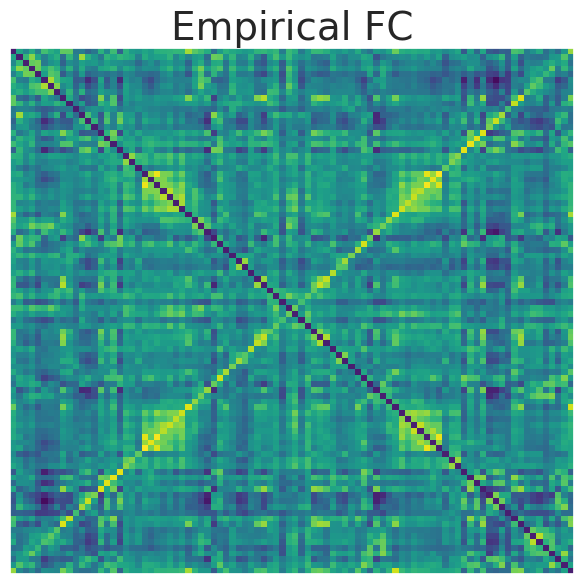

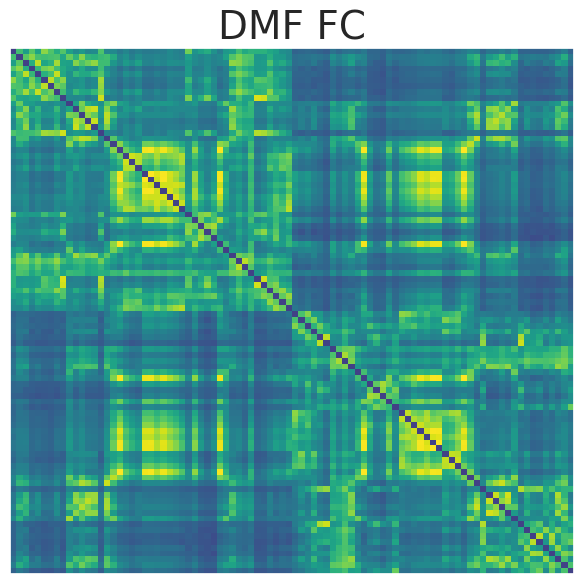

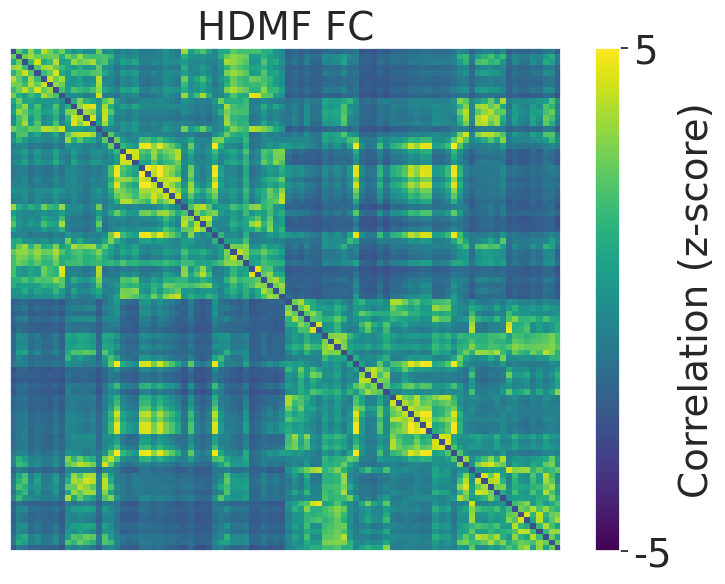

In [46]:
	
# Font sizes
from tkinter import font




# Parameters
figname_base = 'FIG_3_B'

fc_color_palette = 'viridis' #sns.diverging_palette(145, 300, s=60, as_cmap=True)
# Plot A: Empirical FC
fig_a = plt.figure(figsize=(6, 6))
# put 0 on the diagonal

# z-score the fc excluding the diagonal
emp_fc = (emp_fc - np.mean(emp_fc[triu_fc])) / np.std(emp_fc[triu_fc])
lim= np.max(np.abs(emp_fc))
plt.imshow(emp_fc, interpolation='none', aspect='auto', cmap=fc_color_palette, vmin=-lim, vmax=lim)


plt.title('Empirical FC', fontsize=TITLE+6)
plt.xticks([])  # Remove x-tick labels
plt.yticks([])  # Remove y-tick labels
plt.tight_layout()
fig_a.savefig(figfold / (figname_base + 'A.png'), dpi=300)
fig_a.savefig(figfold / (figname_base + 'A.svg'), dpi=300)
plt.show()

# Plot B: DMF FC
fig_b = plt.figure(figsize=(6, 6))
ave_static_fc = np.mean(fcs_grid[0, :16, :, :], axis=0)
# remove the diagonal
ave_static_fc = ave_static_fc
# z-score the fc excluding the diagonal
ave_static_fc = (ave_static_fc - np.mean(ave_static_fc[triu_fc])) / np.std(ave_static_fc[triu_fc])
lim = np.max(np.abs(ave_static_fc))
plt.imshow(ave_static_fc, interpolation='none', aspect='auto', cmap=fc_color_palette, vmin=-lim, vmax=lim)
plt.title('DMF FC', fontsize=TITLE+6)
plt.xticks([])  # Remove x-tick labels
plt.yticks([])  # Remove y-tick labels
plt.tight_layout()
fig_b.savefig(figfold / (figname_base + 'B.png'), dpi=300)
fig_b.savefig(figfold / (figname_base + 'B.svg'), dpi=300)
plt.show()

# Plot C: HDMF FC
fig_c = plt.figure(figsize=(7.55, 6))
ave_dynamic_fc = np.mean(fcs_grid[1, :16, :, :], axis=0)
ave_dynamic_fc = ave_dynamic_fc 
# z-score the fc excluding the diagonal
ave_dynamic_fc = (ave_dynamic_fc - np.mean(ave_dynamic_fc[triu_fc])) / np.std(ave_dynamic_fc[triu_fc])
lim = np.max(np.abs(ave_dynamic_fc))
h = plt.imshow(ave_dynamic_fc, interpolation='none', aspect='auto', cmap=fc_color_palette, vmin=-lim, vmax=lim)
cbar = plt.colorbar(h)
# Put -1 and 1 in the colorbar
cbar.set_ticks([-lim, lim])
cbar.set_ticklabels(['-5', '5'], fontsize=TITLE+6)
cbar.set_label('Correlation (z-score)', fontsize=TITLE+6)
plt.title('HDMF FC', fontsize=TITLE+6)
plt.xticks([])  # Remove x-tick labels
plt.yticks([])  # Remove y-tick labels
plt.tight_layout()
fig_c.savefig(figfold / (figname_base + 'C.png'), dpi=300)
fig_c.savefig(figfold / (figname_base + 'C.svg'), dpi=300)
plt.show()

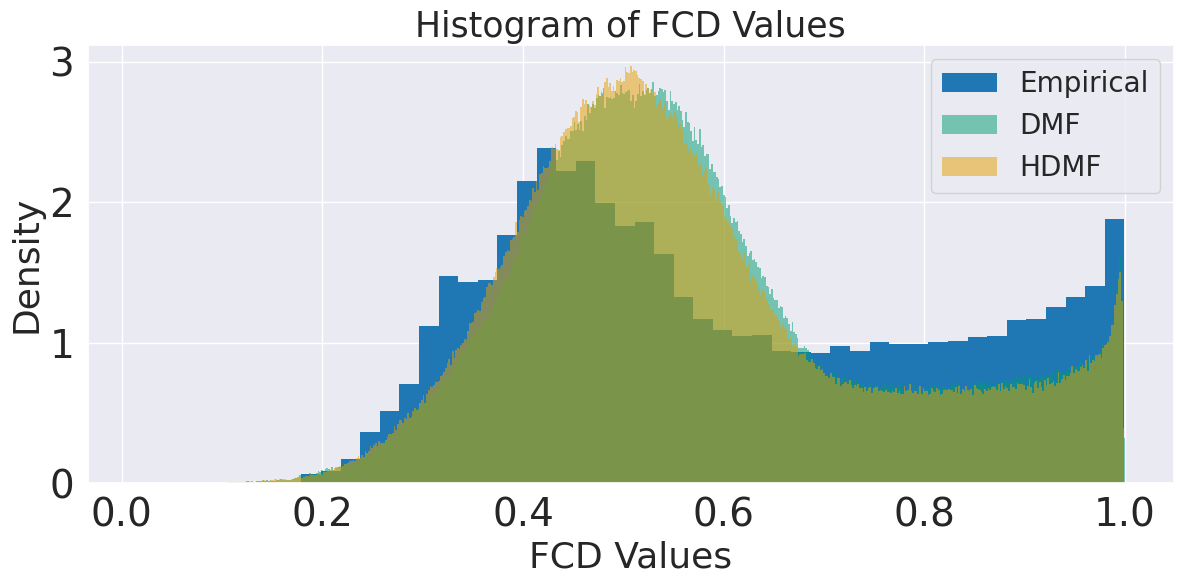

In [47]:

# Separate histogram plot
col_pal = sns.color_palette("tab10", 10)
fig_hist, ax_hist = plt.subplots(1, 1, figsize=(12, 6))
sns.histplot(emp_fcd, stat='density', color=col_pal[0], alpha=1, linewidth=0, ax=ax_hist, label='Empirical')
sns.histplot(sim_fcd_stat, stat='density', color=category_colors['Static'], alpha=0.5, linewidth=0, ax=ax_hist, label='DMF')
sns.histplot(sim_fcd_dyn, stat='density', color=category_colors['Dynamic'], alpha=0.5, linewidth=0, ax=ax_hist, label='HDMF')
ax_hist.set_xlabel('FCD Values', fontsize=LABEL+6)
ax_hist.set_ylabel('Density', fontsize=LABEL+6)
ax_hist.set_title('Histogram of FCD Values', fontsize=TITLE+3)
ax_hist.tick_params(labelsize=TICKS+8)
ax_hist.legend(fontsize=LEGEND)

plt.tight_layout()
fig_hist.savefig(figfold / (figname_base + '_histogram.png'), dpi=300)
fig_hist.savefig(figfold / (figname_base + '_histogram.svg'), dpi=300)
plt.show()